# Analisis Data E-Commerce Public Dataset

*   Nama: Abid Ammar Mahdy
*   E-mail: abidammar1611@gmail.com

# Pertanyaan Bisnis



* Bagaimana persebaran lokasi dari customer dan seller yang menggunakan e-commerce kita?
* Berapa pendapatan tertinggi dan terendah dari seller?
* Berapa nominal tertinggi dan terendah yang dikeluarkan oleh customer?
* Barang apa yang paling banyak dan sedikit terjual?
* Bagaimana tingkat penjualan di setiap bulan?
* Bagaimana RFM analysis pada customer?
* Bagaimana umunya para customer membayar setiap pesanannya?
* Berapa rata-rata selisih waktu tersingkat dan terlama dari customer menekan pembelian hingga paket sampai ke customer untuk setiap seller?
* Berapa rata-rata selisih waktu tersedikit dan terbanyak paket sampai ke customer dengan estimasi yang ditetapkan untuk setiap seller?
* Bagaimana penilaian kepuasan pada customer terhadap pesanan yang diterima?





# Import Library

In [1]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.1 MB/s eta 0:00:00


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
from functools import reduce
from datetime import datetime

In [3]:
!unzip /content/E-commerce-public-dataset.zip

Archive:  /content/E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


# Data Wrangling

## Gathering Data

In [4]:
customers_data = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
customers_data.sort_values('customer_zip_code_prefix')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
23914,7ae2a9337aa4bc799723511faa1d6830,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,sao paulo,SP
11747,a09edf8c1e842e94805a206b3d73eed5,968f6d2f674977d88a4b445a5117ccd8,1004,sao paulo,SP
23990,ee9b73e88afb4904ee2322cfc89cf638,095e7c124c5c1ccb1eb9f731152eae6a,1004,sao paulo,SP
81634,15d7dbcd027b5b24866db33e2b819021,ddab5650ba76e2fa2d7e25ed3343bd92,1005,sao paulo,SP
34298,f3e31afdae80581be48ce94e7b0f3366,ded4351942c7fc292b88e5b090af2b46,1005,sao paulo,SP
...,...,...,...,...,...
17275,f93bb6c70a7306d18a24f77f1889916d,ee0a41f3ec008b1459efbd99c775e6ea,99965,agua santa,RS
41113,3ab8bc00f8740d54afc4c771fb6c7f69,0528a0a940c7116ccb48fdbb8e80a8ff,99970,ciriaco,RS
956,964b34423c822e9bd9831635ccc83db2,e49eafd7e69d43b8d86f6b5590fafd02,99980,david canabarro,RS
96592,657ba09c6edfbbc09f6054f541ec1f90,3dbb390afed2043063d358900ae05d0d,99980,david canabarro,RS


In [5]:
order_items_data = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_data.sort_values('order_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_payments_data = pd.read_csv('/content/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_data.sort_values('order_id')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
85283,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
2499,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
12393,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
32971,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
98711,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...,...
69123,fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
2776,fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
58888,fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85
37089,fffe18544ffabc95dfada21779c9644f,1,credit_card,3,64.71


In [7]:
order_reviews_data = pd.read_csv('/content/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
orders_data = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
orders_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [9]:
product_category_data = pd.read_csv('/content/E-Commerce Public Dataset/product_category_name_translation.csv')
product_category_data

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [10]:
products_data = pd.read_csv('/content/E-Commerce Public Dataset/products_dataset.csv')
products_data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
sellers_data = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_data

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [12]:
geolocation_data = pd.read_csv('/content/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


* Pada data geolocation, terdapat penulisan yang berbeda pada geolocation city.
* Pada data order, order payment, dan order item memiliki jumlah row yang berbeda. Order payment lebih sedikit dibanding order item dan order lebih sedikit dibanding order item. Saya tidak terlalu tahu penyebab hal ini apakah ada order item yang tidak dibayar, atau mungkin ada order item yang tidak tercatat dalam order

## Assessing Data

Untuk menilai data e-commerce, saya akan membagi antara data bernilai numerik dan data bernilai kategorikal. Hal tersebut dikarenakan fungsi describe() pada pandas yang berperilaku berbeda untuk data numerik dan kategorikal.

### Numeric Data

Dilakukan transpose agar bisa menambahkan kolom baru seperti tipe data, jumlah null, duplikat, unique value

In [13]:
cust_desc_num = customers_data.describe().T
geo_desc_num = geolocation_data.describe().T
ord_itm_desc_num = order_items_data.describe().T
ord_pay_desc_num = order_payments_data.describe().T
ord_rvw_desc_num = order_reviews_data.describe().T
ord_desc_num = orders_data.describe().T
prod_cat_desc_num = product_category_data.describe().T
prod_desc_num = products_data.describe().T
sell_desc_num = sellers_data.describe().T

In [14]:
cust_desc_num['dtype'] = customers_data.select_dtypes('number').dtypes
geo_desc_num['dtype'] = geolocation_data.select_dtypes('number').dtypes
ord_itm_desc_num['dtype'] = order_items_data.select_dtypes('number').dtypes
ord_pay_desc_num['dtype'] = order_payments_data.select_dtypes('number').dtypes
ord_rvw_desc_num['dtype'] = order_reviews_data.select_dtypes('number').dtypes
ord_desc_num['dtype'] = orders_data.select_dtypes('number').dtypes
prod_cat_desc_num['dtype'] = product_category_data.select_dtypes('number').dtypes
prod_desc_num['dtype'] = products_data.select_dtypes('number').dtypes
sell_desc_num['dtype'] = sellers_data.select_dtypes('number').dtypes

In [15]:
cust_desc_num['null'] = customers_data.select_dtypes('number').isna().sum()
geo_desc_num['null'] = geolocation_data.select_dtypes('number').isna().sum()
ord_itm_desc_num['null'] = order_items_data.select_dtypes('number').isna().sum()
ord_pay_desc_num['null'] = order_payments_data.select_dtypes('number').isna().sum()
ord_rvw_desc_num['null'] = order_reviews_data.select_dtypes('number').isna().sum()
ord_desc_num['null'] = orders_data.select_dtypes('number').isna().sum()
prod_cat_desc_num['null'] = product_category_data.select_dtypes('number').isna().sum()
prod_desc_num['null'] = products_data.select_dtypes('number').isna().sum()
sell_desc_num['null'] = sellers_data.select_dtypes('number').isna().sum()

In [16]:
cust_desc_num['unique'] = customers_data.select_dtypes('number').nunique()
geo_desc_num['unique'] = geolocation_data.select_dtypes('number').nunique()
ord_itm_desc_num['unique'] = order_items_data.select_dtypes('number').nunique()
ord_pay_desc_num['unique'] = order_payments_data.select_dtypes('number').nunique()
ord_rvw_desc_num['unique'] = order_reviews_data.select_dtypes('number').nunique()
ord_desc_num['unique'] = orders_data.select_dtypes('number').nunique()
prod_cat_desc_num['unique'] = product_category_data.select_dtypes('number').nunique()
prod_desc_num['unique'] = products_data.select_dtypes('number').nunique()
sell_desc_num['unique'] = sellers_data.select_dtypes('number').nunique()

In [17]:
cust_desc_num['duplicated'] = customers_data.duplicated().sum()
geo_desc_num['duplicated'] = geolocation_data.duplicated().sum()
ord_itm_desc_num['duplicated'] = order_items_data.duplicated().sum()
ord_pay_desc_num['duplicated'] = order_payments_data.duplicated().sum()
ord_rvw_desc_num['duplicated'] = order_reviews_data.duplicated().sum()
ord_desc_num['duplicated'] = orders_data.duplicated().sum()
prod_cat_desc_num['duplicated'] = product_category_data.duplicated().sum()
prod_desc_num['duplicated'] = products_data.duplicated().sum()
sell_desc_num['duplicated'] = sellers_data.duplicated().sum()

In [18]:
cust_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0,int64,0,14994,0


In [19]:
geo_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000,int64,0,19015,261831
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933,float64,0,717360,261831
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394,float64,0,717613,261831


In [20]:
ord_itm_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00,int64,0,21,0
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00,float64,0,5968,0
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68,float64,0,6999,0


In [21]:
ord_pay_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00,int64,0,29,0
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00,int64,0,24,0
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08,float64,0,29077,0


In [22]:
ord_desc_num

,count,unique,top,freq,dtype,null,duplicated
order_id,99441,NaN,e481f51cbdc54678b7cc49136f2d6af7,1,NaN,NaN,0
customer_id,99441,NaN,9ef432eb6251297304e76186b10a928d,1,NaN,NaN,0
order_status,99441,NaN,delivered,96478,NaN,NaN,0
order_purchase_timestamp,99441,NaN,2018-04-11 10:48:14,3,NaN,NaN,0
order_approved_at,99281,NaN,2018-02-27 04:31:10,9,NaN,NaN,0
order_delivered_carrier_date,97658,NaN,2018-05-09 15:48:00,47,NaN,NaN,0
order_delivered_customer_date,96476,NaN,2018-05-08 23:38:46,3,NaN,NaN,0
order_estimated_delivery_date,99441,NaN,2017-12-20 00:00:00,522,NaN,NaN,0


In [23]:
ord_rvw_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0,int64,0,5,0


In [24]:
prod_cat_desc_num

,count,unique,top,freq,dtype,null,duplicated
product_category_name,71,NaN,beleza_saude,1,NaN,NaN,0
product_category_name_english,71,NaN,health_beauty,1,NaN,NaN,0


In [25]:
prod_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0,float64,610,66,0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0,float64,610,2960,0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0,float64,610,19,0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0,float64,2,2204,0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0,float64,2,99,0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0,float64,2,102,0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0,float64,2,95,0


In [26]:
sell_desc_num

,count,mean,std,min,25%,50%,75%,max,dtype,null,unique,duplicated
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0,int64,0,2246,0


### Category Data

Untuk penilaian data kategorikal sama dengan data numerik

In [27]:
cust_desc_cat = customers_data.describe(include='O').T
geo_desc_cat = geolocation_data.describe(include='O').T
ord_itm_desc_cat = order_items_data.describe(include='O').T
ord_pay_desc_cat = order_payments_data.describe(include='O').T
ord_rvw_desc_cat = order_reviews_data.describe(include='O').T
ord_desc_cat = orders_data.describe(include='O').T
prod_cat_desc_cat = product_category_data.describe(include='O').T
prod_desc_cat = products_data.describe(include='O').T
sell_desc_cat = sellers_data.describe(include='O').T

In [28]:
cust_desc_cat['dtype'] = customers_data.select_dtypes('O').dtypes
geo_desc_cat['dtype'] = geolocation_data.select_dtypes('O').dtypes
ord_itm_desc_cat['dtype'] = order_items_data.select_dtypes('O').dtypes
ord_pay_desc_cat['dtype'] = order_payments_data.select_dtypes('O').dtypes
ord_rvw_desc_cat['dtype'] = order_reviews_data.select_dtypes('O').dtypes
ord_desc_cat['dtype'] = orders_data.select_dtypes('O').dtypes
prod_cat_desc_cat['dtype'] = product_category_data.select_dtypes('O').dtypes
prod_desc_cat['dtype'] = products_data.select_dtypes('O').dtypes
sell_desc_cat['dtype'] = sellers_data.select_dtypes('O').dtypes

In [29]:
cust_desc_cat['null'] = customers_data.select_dtypes('O').isna().sum()
geo_desc_cat['null'] = geolocation_data.select_dtypes('O').isna().sum()
ord_itm_desc_cat['null'] = order_items_data.select_dtypes('O').isna().sum()
ord_pay_desc_cat['null'] = order_payments_data.select_dtypes('O').isna().sum()
ord_rvw_desc_cat['null'] = order_reviews_data.select_dtypes('O').isna().sum()
ord_desc_cat['null'] = orders_data.select_dtypes('O').isna().sum()
prod_cat_desc_cat['null'] = product_category_data.select_dtypes('O').isna().sum()
prod_desc_cat['null'] = products_data.select_dtypes('O').isna().sum()
sell_desc_cat['null'] = sellers_data.select_dtypes('O').isna().sum()

In [30]:
cust_desc_cat['unique'] = customers_data.select_dtypes('O').nunique()
geo_desc_cat['unique'] = geolocation_data.select_dtypes('O').nunique()
ord_itm_desc_cat['unique'] = order_items_data.select_dtypes('O').nunique()
ord_pay_desc_cat['unique'] = order_payments_data.select_dtypes('O').nunique()
ord_rvw_desc_cat['unique'] = order_reviews_data.select_dtypes('O').nunique()
ord_desc_cat['unique'] = orders_data.select_dtypes('O').nunique()
prod_cat_desc_cat['unique'] = product_category_data.select_dtypes('O').nunique()
prod_desc_cat['unique'] = products_data.select_dtypes('O').nunique()
sell_desc_cat['unique'] = sellers_data.select_dtypes('O').nunique()

In [31]:
cust_desc_cat['duplicated'] = customers_data.duplicated().sum()
geo_desc_cat['duplicated'] = geolocation_data.duplicated().sum()
ord_itm_desc_cat['duplicated'] = order_items_data.duplicated().sum()
ord_pay_desc_cat['duplicated'] = order_payments_data.duplicated().sum()
ord_rvw_desc_cat['duplicated'] = order_reviews_data.duplicated().sum()
ord_desc_cat['duplicated'] = orders_data.duplicated().sum()
prod_cat_desc_cat['duplicated'] = product_category_data.duplicated().sum()
prod_desc_cat['duplicated'] = products_data.duplicated().sum()
sell_desc_cat['duplicated'] = sellers_data.duplicated().sum()

In [32]:
cust_desc_cat

,count,unique,top,freq,dtype,null,duplicated
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1,object,0,0
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,object,0,0
customer_city,99441,4119,sao paulo,15540,object,0,0
customer_state,99441,27,SP,41746,object,0,0


In [33]:
geo_desc_cat

,count,unique,top,freq,dtype,null,duplicated
geolocation_city,1000163,8011,sao paulo,135800,object,0,261831
geolocation_state,1000163,27,SP,404268,object,0,261831


In [34]:
ord_itm_desc_cat

,count,unique,top,freq,dtype,null,duplicated
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,object,0,0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,object,0,0
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,object,0,0
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,object,0,0


In [35]:
ord_pay_desc_cat

,count,unique,top,freq,dtype,null,duplicated
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,object,0,0
payment_type,103886,5,credit_card,76795,object,0,0


In [36]:
ord_desc_cat

,count,unique,top,freq,dtype,null,duplicated
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1,object,0,0
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1,object,0,0
order_status,99441,8,delivered,96478,object,0,0
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3,object,0,0
order_approved_at,99281,90733,2018-02-27 04:31:10,9,object,160,0
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47,object,1783,0
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3,object,2965,0
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522,object,0,0


In [37]:
ord_rvw_desc_cat

,count,unique,top,freq,dtype,null,duplicated
review_id,99224,98410,7b606b0d57b078384f0b58eac1d41d78,3,object,0,0
order_id,99224,98673,c88b1d1b157a9999ce368f218a407141,3,object,0,0
review_comment_title,11568,4527,Recomendo,423,object,87656,0
review_comment_message,40977,36159,Muito bom,230,object,58247,0
review_creation_date,99224,636,2017-12-19 00:00:00,463,object,0,0
review_answer_timestamp,99224,98248,2017-06-15 23:21:05,4,object,0,0


In [38]:
prod_cat_desc_cat

,count,unique,top,freq,dtype,null,duplicated
product_category_name,71,71,beleza_saude,1,object,0,0
product_category_name_english,71,71,health_beauty,1,object,0,0


In [39]:
prod_desc_cat

,count,unique,top,freq,dtype,null,duplicated
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1,object,0,0
product_category_name,32341,73,cama_mesa_banho,3029,object,610,0


In [40]:
sell_desc_cat

,count,unique,top,freq,dtype,null,duplicated
seller_id,3095,3095,3442f8959a84dea7ee197c632cb2df15,1,object,0,0
seller_city,3095,611,sao paulo,694,object,0,0
seller_state,3095,23,SP,1849,object,0,0


* Pada deskripsi data numerik, product category dan orders menampilkan nilai NaN. Hal tersebut dikarenakan tidak ada kolom bertipe data numerik pada 2 data tersebut
* Terdapat beberapa geolocation zip code prefix yang sama tetapi nilai koordinatnya berbeda. Pada data costumer dan seller zip code harusnya hanya menunjuk satu data zip code. Oleh karena itu, pada cleaning data nanti akan dihilangkan data duplikat
* Berdasarkan deskripsi di atas, bisa dilihat bahwa terdapat null value di data products, orders, dan order reviews
* Untuk data waktu dan tanggal semuanya masih termasuk object, jadi pada proses cleaning data akan diubah ke datetime
* Data yang memiliki nilai duplikat hanya ada pada geolocation
* Unique value pada data order item lebih sedikit dibanding order payment dan orders. Apakah mungkin ada order item yang tidak dibayar/tidak tercatat di orders?
* Ada perbedaan 1 unique value pada order payment dan orders. Apakah ada order payment yang tidak tercatat di orders?
* Seller dan customer city ada yang mempunyai zip code sama teteapi nama city beda. Hal ini akan diatasi di proses cleaning data
* Pada data order reviews, terdapat review id dan order id yang terduplikat. Seharusnya 1 review oleh customer diwakili oleh 1 review_id, begitu juga dengan order id

## Data Cleaning

In [41]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

geolocation_data['geolocation_city'] = geolocation_data['geolocation_city'].apply(pretty_string)
customers_data['customer_city'] = customers_data['customer_city'].apply(pretty_string)
sellers_data['seller_city'] = sellers_data['seller_city'].apply(pretty_string)

Karena ada banyak zip code prefix yang bernilai sama, maka nilai yang sama akan dihilangkan dan menyisakan satu row saja. Untuk memilih mana row yang dibiarkan, maka dilakukan sorting berdasarkan zip code, city, dan state. Ada beberapa zip code yang memiliki nilai city dan state yang berbeda. Oleh karena itu, saya akan mengambil nilai tengah, dimana nilai tengah tersebut pasti bernilai city dan state yang paling banyak di grup zip code.

In [42]:
drop_duplicate_geo_data = geolocation_data.drop_duplicates().sort_values(by=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])
new_geo_data = drop_duplicate_geo_data.groupby(['geolocation_zip_code_prefix'], as_index=False).apply(lambda x: x if len(x)//2 == 0 else x.iloc[[len(x)//2]]).reset_index(level=0, drop=True)
new_geo_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
519,1001,-23.551337,-46.634027,sao paulo,SP
516,1002,-23.548137,-46.635905,sao paulo,SP
500,1003,-23.548976,-46.635322,sao paulo,SP
804,1004,-23.549497,-46.634468,sao paulo,SP
584,1005,-23.549980,-46.634768,sao paulo,SP
...,...,...,...,...,...
999861,99960,-27.953409,-52.031394,charrua,RS
999949,99965,-28.181715,-52.035593,agua santa,RS
999874,99970,-28.344122,-51.875680,ciriaco,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS


Menyeragamkan city dan state pada customer dan seller sesuai dengan zip code yang ada di geolocation

In [43]:
sellers_data['seller_city'] = sellers_data['seller_zip_code_prefix'].map(new_geo_data.set_index('geolocation_zip_code_prefix')['geolocation_city'])
sellers_data['seller_state'] = sellers_data['seller_zip_code_prefix'].map(new_geo_data.set_index('geolocation_zip_code_prefix')['geolocation_state'])
customers_data['customer_city'] = customers_data['customer_zip_code_prefix'].map(new_geo_data.set_index('geolocation_zip_code_prefix')['geolocation_city'])
customers_data['customer_state'] = customers_data['customer_zip_code_prefix'].map(new_geo_data.set_index('geolocation_zip_code_prefix')['geolocation_state'])

Mengisi data order review yang kosong

In [44]:
order_reviews_data['review_comment_title'].fillna(value='no title', inplace=True)
order_reviews_data['review_comment_message'].fillna(value='no comment', inplace=True)

In [45]:
order_reviews_data.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [46]:
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'])
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'])
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])

In [47]:
order_items_data.info(), order_reviews_data.info(), orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object     

(None, None, None)

* Untuk null value yang ada pada data products akan dibiarkan saja. Hal tersebut dikarenakan product id yang tidak ada nilai null sehingga product masih bisa dikenali melalui id
* Untuk null value pada data orders akan dilihat terlebih order status terlebih dahulu di bagian EDA. Kemungkinan null value tersebut karena ada order yang canceled atau ada status tertentu

# Exploratory Data Analysis (EDA)

## Explore data customers

In [48]:
customers_data.groupby(['customer_city', 'customer_zip_code_prefix', 'customer_state'])[['customer_id']].count().sort_values('customer_id', ascending=False).head(20)

,,,customer_id
customer_city,customer_zip_code_prefix,customer_state,
rio de janeiro,22790,RJ,142
niteroi,24220,RJ,124
rio de janeiro,22793,RJ,121
niteroi,24230,RJ,117
rio de janeiro,22775,RJ,110
vila velha,29101,ES,101
jundiai,13212,SP,95
ipatinga,35162,MG,93
rio de janeiro,22631,RJ,89


## Explore data order items

In [49]:
order_items_data.groupby(['product_id']).agg({
    'order_id': 'count',
    'price': ['min', 'max', 'mean'],
    'freight_value': ['min', 'max', 'mean']
}).sort_values((   'order_id', 'count'), ascending=False).head(20)

order_id   price                      \
                                    count     min     max        mean   
product_id                                                              
aca2eb7d00ea1a7b8ebd4e68314663af      527   69.90  109.90   71.364137   
99a4788cb24856965c36a24e339b6058      488   74.00   89.90   88.167131   
422879e10f46682990de24d770e7f83d      484   49.00   59.90   54.911612   
389d119b48cf3043d311335e499d9c6b      392   49.00   59.90   54.695383   
368c6c730842d78016ad823897a372db      388   49.00   59.90   54.270103   
53759a2ecddad2bb87a079a1f1519f73      373   49.00   59.90   54.657373   
d1c427060a0f73f6b889a5c7c61f2ac4      343  109.99  189.99  137.651633   
53b36df67ebb7c41585e8d54d6772e08      323   99.90  179.90  116.666935   
154e7e31ebfa092203795c972e5804a6      281   19.99   23.99   22.509573   
3dd2a17168ec895c781a9191c1e95ad7      274  149.90  159.90  149.936496   
2b4609f8948be18874494203496bc318      260   79.99   89.99   87.373923   
7c1bd920dbdf22470b68bde975dd3ccf      231   54.99   68.99   60.028961   
a62e25e09e05e6faf31d90c6ec1aa3d1      226  105.00  108.00  106.420354   
5a848e4ab52fd5445cdc07aab1c40e48      197  122.99  122.99  122.990000   
bb50f2e236e5eea0100680137654686c      195  325.00  330.00  327.615385   
e0d64dcfaa3b6db5c54ca298ae101d05      194  124.90  255.61  163.849588   
42a2c92a0979a949ca4ea89ec5c7b934      183   56.50   59.90   59.399454   
e53e557d5a159f5aa2c5e995dfdf244b      183   74.90  109.90   84.367486   
b532349fe46b38fbc7bb3914c1bdae07      169   32.99   38.40   36.462189   
35afc973633aaeb6b877ff57b2793310      165   77.90   89.99   87.787212   

                                 freight_value                     
                                           min     max       mean  
product_id                                                         
aca2eb7d00ea1a7b8ebd4e68314663af          0.00   35.85  13.684744  
99a4788cb24856965c36a24e339b6058          1.18   57.33  16.487787  
422879e10f46682990de24d770e7f83d          0.00   83.27  15.752149  
389d119b48cf3043d311335e499d9c6b          2.03   64.80  18.474719  
368c6c730842d78016ad823897a372db          5.89   48.29  17.854639  
53759a2ecddad2bb87a079a1f1519f73          3.21   52.95  18.447802  
d1c427060a0f73f6b889a5c7c61f2ac4          7.64  105.07  40.121050  
53b36df67ebb7c41585e8d54d6772e08          0.00   51.31   7.041827  
154e7e31ebfa092203795c972e5804a6          0.78   34.15  13.302206  
3dd2a17168ec895c781a9191c1e95ad7          9.02   84.60  26.020511  
2b4609f8948be18874494203496bc318          0.00  185.73  15.163538  
7c1bd920dbdf22470b68bde975dd3ccf          7.39   62.55  16.202554  
a62e25e09e05e6faf31d90c6ec1aa3d1          3.40   62.99  17.465929  
5a848e4ab52fd5445cdc07aab1c40e48          0.00   51.36  15.517868  
bb50f2e236e5eea0100680137654686c          7.54   53.03  19.082564  
e0d64dcfaa3b6db5c54ca298ae101d05          3.93   47.50  18.336443  
42a2c92a0979a949ca4ea89ec5c7b934          7.08   47.85  18.518415  
e53e557d5a159f5aa2c5e995dfdf244b          3.31   43.04  16.232077  
b532349fe46b38fbc7bb3914c1bdae07          3.11   38.52  15.082604  
35afc973633aaeb6b877ff57b2793310          1.24   57.16  15.889697

## Explore order payments

In [50]:
order_payments_data.groupby(['payment_type']).agg({
    'order_id': 'count',
    'payment_installments': ['min', 'max', 'mean'],
    'payment_value': ['min', 'max', 'mean']
}).sort_values((   'order_id', 'count'), ascending=False)

order_id payment_installments               payment_value  \
                count                  min max      mean           min   
payment_type                                                             
credit_card     76795                    0  24  3.507155          0.01   
boleto          19784                    1   1  1.000000         11.62   
voucher          5775                    1   1  1.000000          0.00   
debit_card       1529                    1   1  1.000000         13.38   
not_defined         3                    1   1  1.000000          0.00   

                                    
                   max        mean  
payment_type                        
credit_card   13664.08  163.319021  
boleto         7274.88  145.034435  
voucher        3184.34   65.703354  
debit_card     4445.50  142.570170  
not_defined       0.00    0.000000

## Explore data orders

In [51]:
orders_data.groupby(['order_status']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [52]:
orders_data[orders_data['order_approved_at'].isna()].groupby(['order_status']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
order_status,
canceled,141
delivered,14
created,5


Ada beberapa data dengan order status delivered, tetapi tanggal order_approved_at kosong. Seharusnya sebelum paket dikirim, order disetujui oleh seller. Mungkin terdapat kehilangan data atau mungkin ada faktor lain.

In [53]:
orders_data[orders_data['order_delivered_carrier_date'].isna()].groupby(['order_status']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
order_status,
unavailable,609
canceled,550
invoiced,314
processing,301
created,5
approved,2
delivered,2


Ada 2 data dengan order status delivered, tetapi tanggal order_delivered_carrier_date kosong. Seharusnya setelah paket tersampaikan, maka ada tanggal penerimaan oleh kurir.

In [54]:
orders_data[orders_data['order_delivered_customer_date'].isna()].groupby(['order_status']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
order_status,
shipped,1107
canceled,619
unavailable,609
invoiced,314
processing,301
delivered,8
created,5
approved,2


Order status bernilai shipped memiliki nilai null yang paling banyak. Mungkin ini menandakan ada paket yang dalam proses pengiriman, tetapi tidak sampai ke pembeli

In [55]:
orders_data[orders_data['order_approved_at'].isna() &
            orders_data['order_delivered_carrier_date'].isna() &
            orders_data['order_delivered_customer_date'].isna()].groupby(['order_status']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
order_status,
canceled,141
created,5


## Melakukan analisis pada data orders, order payment, dan order item

In [56]:
order_items_data[~order_items_data['order_id'].isin(order_payments_data['order_id'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84390,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
84391,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


order id yang ada di order items tetapi tidak ada di order payments hanya ada 1, yaitu bfbd0f9bdef84302105ad712db648a6c

In [57]:
order_payments_data[~order_payments_data['order_id'].isin(order_items_data['order_id'])].groupby(['order_id']).agg(['count']).sort_values((   'payment_sequential', 'count'), ascending=False)['payment_type'].head(10)

,count
order_id,
48f2d0b950703bfb145b7c3c0641b4bb,10
0b398dbb3e7c81005f3c69b01488c4c9,9
896fbd78a9ef3839b34b893f48f6bc67,8
1857e77a4bad8abb2db929f107430663,6
59798edc300f7563a9bdf18b2740def9,4
b34369ee8397436dd7ceb8bb7783671d,4
cdf36cd4632fe33085adec5cf3d6b306,3
20ff9b4b339b20ef47cfcda736a17a52,2
08ee9c1b1da47ffd2a7c7163aa134b16,2


Jumlah order id yang ada di order payments, tetapi tidak ada di order items lebih banyak dibanding order id yang ada di order item, tetapi tidak ada di order payments. Menariknya, jumlah data pada order item lebih banyak dibandingkan dengan order payments. Mungkin ada kesalahan input data atau mungkin ada transaksi untuk barang yang tidak tercatat di order item (?)

In [58]:
order_items_data[~order_items_data['order_id'].isin(orders_data['order_id'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [59]:
orders_data[~orders_data['order_id'].isin(order_items_data['order_id'])].groupby(['order_id']).agg(['count']).sort_values((   'customer_id', 'count'), ascending=False)['customer_id'].head(10)

,count
order_id,
0010dedd556712d7bb69a19cb7bbd37a,1
9bc5c73ed95bec088ff04d924946fa45,1
a3777b94ef07749f031ade4ae824ddb2,1
a37c3175caa4465852b788987ca46d1a,1
a3b14686446d3401d67a3421891c34a3,1
a3beebf1efa956ba70cf01a80c483367,1
a3ef7e4271c9088cf2d3de8305ef2355,1
a4f71a0d584883f990018a219bb7dfb4,1
a536059a071793ef05e7e63cbac9d50e,1


Sama seperti analisis sebelumnya, jumlah order id yang ada di orders tetapi tidak ada di order item cukup banyak. Padahal data orders jumlahnya lebih sedikit dibanding order item. Saya berasumsi bahwa semua aktifitas pemesanan tercatat di data orders. Mungkin ada aktifitas pemesanan yang tidak tercatat di orders

In [60]:
order_payments_data[~order_payments_data['order_id'].isin(orders_data['order_id'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [61]:
orders_data[~orders_data['order_id'].isin(order_payments_data['order_id'])]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04


Di sini juga ditemukan ada hal yang menarik dimana ada barang yang sudah sampai di tangan pembeli, tetapi riwayat pembayarannya tidak tercatat

## Eksplore order reviews

In [62]:
order_reviews_data.groupby(['review_score']).agg({
    'order_id': 'count'
}).sort_values((   'order_id'), ascending=False)

,order_id
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


## Eksplore data product

In [63]:
products_data.groupby(['product_category_name'])[['product_id']].count().sort_values('product_id', ascending=False).head(20)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


## Eksplore data seller

In [64]:
sellers_data.groupby(['seller_city', 'seller_zip_code_prefix', 'seller_state'])[['seller_id']].count().sort_values('seller_id', ascending=False).head(20)

,,,seller_id
seller_city,seller_zip_code_prefix,seller_state,
ibitinga,14940,SP,49
porto ferreira,13660,SP,10
birigui,16200,SP,9
pedreira,13920,SP,9
ribeirao preto,14020,SP,8
sao paulo,1026,SP,8
maringa,87050,PR,8
santa rita do sapucai,37540,MG,7
limeira,13481,SP,7


Untuk data product category tidak dilakukan eksplorasi karena data hanya berisi terjemahan kata

## Merge dataframe

Untuk melakukan penggabungan data, saya akan menggunakan inner join. Hal tersebut dikarenakan untuk mengurangi potensi jumlah null value yang bertambah apabila dilakukan left, right, ataupun outer join

In [65]:
data_frames = [order_items_data, order_payments_data, orders_data, order_reviews_data]
order_merged = reduce(lambda  left,right: pd.merge(left,right,on=['order_id'],
                                            how='inner'), data_frames)
order_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,97ca439bc427b48bc1cd7177abe71365,5,no title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,7b07bacd811c4117b742569b04ce3580,4,no title,no comment,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0c5b33dea94867d1ac402749e5438e8b,5,no title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,f4028d019cb58564807486a6aaf33817,4,no title,no comment,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,940144190dcba6351888cafa43f3a3a5,5,no title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,...,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,9185f849f32d82e216a4e025e0c50f5c,5,no title,no comment,2018-05-11,2018-05-14 12:53:47
117325,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,...,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,be803f6a93d64719fd685c1cc610918a,5,no title,no comment,2018-07-24,2018-07-25 09:25:29
117326,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,...,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,dbdd81cd59a1a9f94a10a990b4d48dce,5,no title,no comment,2017-10-29,2017-10-29 21:33:52
117327,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,...,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,fba117c9ac40d41ca7be54741f471303,5,no title,Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18 12:24:05


In [66]:
order_product_merged = order_merged.merge(products_data, how='inner', on='product_id')
order_product_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,...,2017-09-21,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1,boleto,1,...,2017-07-14,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1,credit_card,2,...,2018-06-05,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1,credit_card,3,...,2017-08-10,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1,credit_card,4,...,2017-08-25,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1,credit_card,1,...,2018-07-24,2018-07-25 00:25:51,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0
117325,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1,credit_card,2,...,2018-08-22,2018-08-25 14:22:54,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0
117326,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,1,credit_card,1,...,2017-06-09,2017-06-12 11:05:17,relogios_presentes,33.0,658.0,3.0,400.0,19.0,9.0,15.0
117327,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,1,credit_card,7,...,2018-01-09,2018-01-11 23:56:38,esporte_lazer,32.0,280.0,2.0,2700.0,60.0,15.0,15.0


In [67]:
order_product_cat_merged = order_product_merged.merge(product_category_data, how='inner', on='product_category_name')
order_product_cat_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,1,credit_card,3,...,2018-03-19 09:12:20,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
115605,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,1,boleto,1,...,2018-03-29 11:16:27,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
115606,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,17.07,1,boleto,1,...,2017-11-03 23:05:43,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes
115607,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,7.49,1,credit_card,6,...,2018-06-07 01:17:50,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,fashion_childrens_clothes


In [68]:
order_product_cat_seller_merged = order_product_cat_merged.merge(sellers_data, how='inner', on='seller_id')
order_product_cat_seller_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,RJ
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,RJ
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,RJ
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fa752aebeda0a3f9a2626bc507550c3f,2,7ae1a5d0600076501c7ff50c63938b48,2a167ca73899c85001a837d8fb4962f6,2018-07-23 13:41:32,1099.00,34.64,1,credit_card,10,...,1973.0,6.0,1900.0,26.0,32.0,13.0,costruction_tools_tools,37540,santa rita do sapucai,MG
115605,157de1652c032429a625d034be79eeeb,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-05-16 09:10:18,24.99,14.10,1,credit_card,3,...,1108.0,2.0,200.0,27.0,14.0,13.0,fashion_sport,6038,osasco,SP
115606,157de1652c032429a625d034be79eeeb,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-05-16 09:10:18,24.99,14.10,1,credit_card,3,...,1108.0,2.0,200.0,27.0,14.0,13.0,fashion_sport,6038,osasco,SP
115607,57edfe6486364c7777241f5ab5902715,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-06-19 11:03:07,24.99,15.10,1,credit_card,4,...,1108.0,2.0,200.0,27.0,14.0,13.0,fashion_sport,6038,osasco,SP


In [69]:
all_data = order_product_cat_seller_merged.merge(customers_data, how='inner', on='customer_id')
all_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,9.0,14.0,cool_stuff,27277,volta redonda,RJ,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,1,boleto,1,...,9.0,14.0,cool_stuff,27277,volta redonda,RJ,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1,credit_card,2,...,9.0,14.0,cool_stuff,27277,volta redonda,RJ,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,1,credit_card,3,...,9.0,14.0,cool_stuff,27277,volta redonda,RJ,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,1,credit_card,4,...,9.0,14.0,cool_stuff,27277,volta redonda,RJ,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,fa752aebeda0a3f9a2626bc507550c3f,2,7ae1a5d0600076501c7ff50c63938b48,2a167ca73899c85001a837d8fb4962f6,2018-07-23 13:41:32,1099.00,34.64,1,credit_card,10,...,32.0,13.0,costruction_tools_tools,37540,santa rita do sapucai,MG,fa094305fdb6062436c99adba7d53dde,74455,goiania,GO
115605,157de1652c032429a625d034be79eeeb,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-05-16 09:10:18,24.99,14.10,1,credit_card,3,...,14.0,13.0,fashion_sport,6038,osasco,SP,8c21dd8c37144807c601f99f2a209dfb,72587,NaN,NaN
115606,157de1652c032429a625d034be79eeeb,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-05-16 09:10:18,24.99,14.10,1,credit_card,3,...,14.0,13.0,fashion_sport,6038,osasco,SP,8c21dd8c37144807c601f99f2a209dfb,72587,NaN,NaN
115607,57edfe6486364c7777241f5ab5902715,1,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,2017-06-19 11:03:07,24.99,15.10,1,credit_card,4,...,14.0,13.0,fashion_sport,6038,osasco,SP,5408b524d4f3a4ac4e9b7b52d993fae7,95940,arroio do meio,RS


Untuk geolocation data akan digabungkan dengan data customer dan seller sendiri-sendiri, karena data geolocation hanya digunakan untuk geoanalysis dengan memanfaatkan kolom geolocation longitude dan latitude

In [70]:
new_cust_data = customers_data.rename(columns={'customer_zip_code_prefix': 'geolocation_zip_code_prefix',
                                               'customer_city': 'geolocation_city',
                                               'customer_state': 'geolocation_state'})
geo_cust_data = new_cust_data.merge(new_geo_data, how='inner', on=['geolocation_zip_code_prefix'])
geo_cust_data

,customer_id,customer_unique_id,geolocation_zip_code_prefix,geolocation_city_x,geolocation_state_x,geolocation_lat,geolocation_lng,geolocation_city_y,geolocation_state_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.503288,-47.390448,franca,SP
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.503288,-47.390448,franca,SP
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.503288,-47.390448,franca,SP
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.503288,-47.390448,franca,SP
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.503288,-47.390448,franca,SP
...,...,...,...,...,...,...,...,...,...
99158,0b7a30ba373aeb55cf28add5b5477956,8c8173e547e020f411aa55b2fceed861,87145,paicandu,PR,-23.501992,-52.150755,paicandu,PR
99159,ff6b440b2465bfaef05c675efb48cd15,e38a27b979a552e019e297ecc22dc67b,98860,eugenio de castro,RS,-28.532196,-54.144722,eugenio de castro,RS
99160,3f7029d9b98a47370cd5f3a97adcbccd,5894d202cc869b4ec460fce3c6ed8cb5,5538,sao paulo,SP,-23.589711,-46.736508,sao paulo,SP
99161,d9110683c7a282144e9fc97660026a28,5cbfdb85ec130898108b32c50d619c39,74980,aparecida de goiania,GO,-16.822945,-49.244615,aparecida de goiania,GO


In [71]:
new_sell_data = sellers_data.rename(columns={'seller_zip_code_prefix': 'geolocation_zip_code_prefix',
                                             'seller_city': 'geolocation_city',
                                             'seller_state': 'geolocation_state'})
geo_sell_data = new_sell_data.merge(new_geo_data, how='inner', on=['geolocation_zip_code_prefix',
                                                              'geolocation_city',
                                                              'geolocation_state'])
geo_sell_data

,seller_id,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891515,-47.060648
1,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.891515,-47.060648
2,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.391584,-46.952732
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910814,-43.177226
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.910814,-43.177226
...,...,...,...,...,...,...
3083,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP,-23.535454,-46.732992
3084,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,-23.448632,-51.867929
3085,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,-23.658400,-46.675130
3086,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,-31.755941,-52.318592


In [72]:
customers_data[~customers_data['customer_zip_code_prefix'].isin(new_geo_data['geolocation_zip_code_prefix'])]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
354,ecb1725b26e8b8c458181455dfa434ea,b55a113bb84fc10eaf58c6d09ec69794,72300,NaN,NaN
382,bcf86029aeed4ed8bac0e16eb14c22f5,7cd7974c9f79f75b77f323878ef87f43,11547,NaN,NaN
877,f4302056f0c58570522590f8181de2c7,67b05b597a66b5c449025000b9430abb,64605,NaN,NaN
1218,03bbe0ce5c28e05f22917607db798818,8f3dca4306d5a89e4ae2c65c110603a2,72465,NaN,NaN
1272,ad4950aded55c2ea376be59506456d68,aa2b96dd03307ea6dc4b763c0b5f0b39,7729,NaN,NaN
...,...,...,...,...,...
97467,cf818420383856a129134f5f8343f7b8,795c495a65f983b242fb01bd507977c5,72338,NaN,NaN
97780,67f3e907dce402e696b15f9308ff22ed,6f232f2f5c7f33b7bd9d794d2afacadd,68629,NaN,NaN
98140,f792e419335df11d82c32efcfb09c51b,c04c085b8e7573ba87b9ae1968d0985e,28530,NaN,NaN
98878,78a11bb1fa72f556996b9a5b9bcd0629,e7536f62a200b415edd9491ac12a17fa,55863,NaN,NaN


In [73]:
sellers_data[~sellers_data['seller_zip_code_prefix'].isin(new_geo_data['geolocation_zip_code_prefix'])]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
473,5962468f885ea01a1b6a97a218797b0a,82040,NaN,NaN
791,2aafae69bf4c41fbd94053d9413e87ee,91901,NaN,NaN
1672,2a50b7ee5aebecc6fd0ff9784a4747d6,72580,NaN,NaN
1931,2e90cb1677d35cfe24eef47d441b7c87,2285,NaN,NaN
2182,0b3f27369a4d8df98f7eb91077e438ac,7412,NaN,NaN
2986,42bde9fef835393bb8a8849cb6b7f245,71551,NaN,NaN
3028,870d0118f7a9d85960f29ad89d5d989a,37708,NaN,NaN


Setelah melakukan merge data, kita menemukan sesuatu yang menarik. Terdapat beberapa customer dan seller memiliki nilai zip_code_prefix yang tidak ada di data geolocation. Mungkin terjadi kesalahan input pada data customer dan seller atau data geolocation tidak lengkap

In [74]:
all_data.to_csv('all_data.csv', index=False)
geo_cust_data.to_csv('geo_cust_data.csv', index=False)
geo_sell_data.to_csv('geo_sell_data.csv', index=False)

Simpan all_data, geo_cust, dan seller_cust ke dalam csv, agar bisa langsung digunakan tanpa perlu melakukan merging kembali.

# Data Visualization & Explanatory Data Analysis

## Bagaimana persebaran lokasi dari customer dan seller yang menggunakan e-commerce kita?

In [153]:
import geopandas as gpd

In [154]:
!unzip '/content/data (3).zip'

Archive:  /content/data (3).zip
replace ne_10m_admin_0_countries.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries.shp.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries-fgdc.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries-iso19110.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ne_10m_admin_0_countries-iso19139.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [155]:
geo_cust_data = pd.read_csv('/content/geo_cust_data.csv')
geo_sell_data = pd.read_csv('/content/geo_sell_data.csv')

In [156]:
gcdf = gpd.GeoDataFrame(
    geo_cust_data, geometry=gpd.points_from_xy(geo_cust_data.geolocation_lng, geo_cust_data.geolocation_lat), crs="EPSG:4326"
)

gsdf = gpd.GeoDataFrame(
    geo_sell_data, geometry=gpd.points_from_xy(geo_sell_data.geolocation_lng, geo_sell_data.geolocation_lat), crs="EPSG:4326"
)

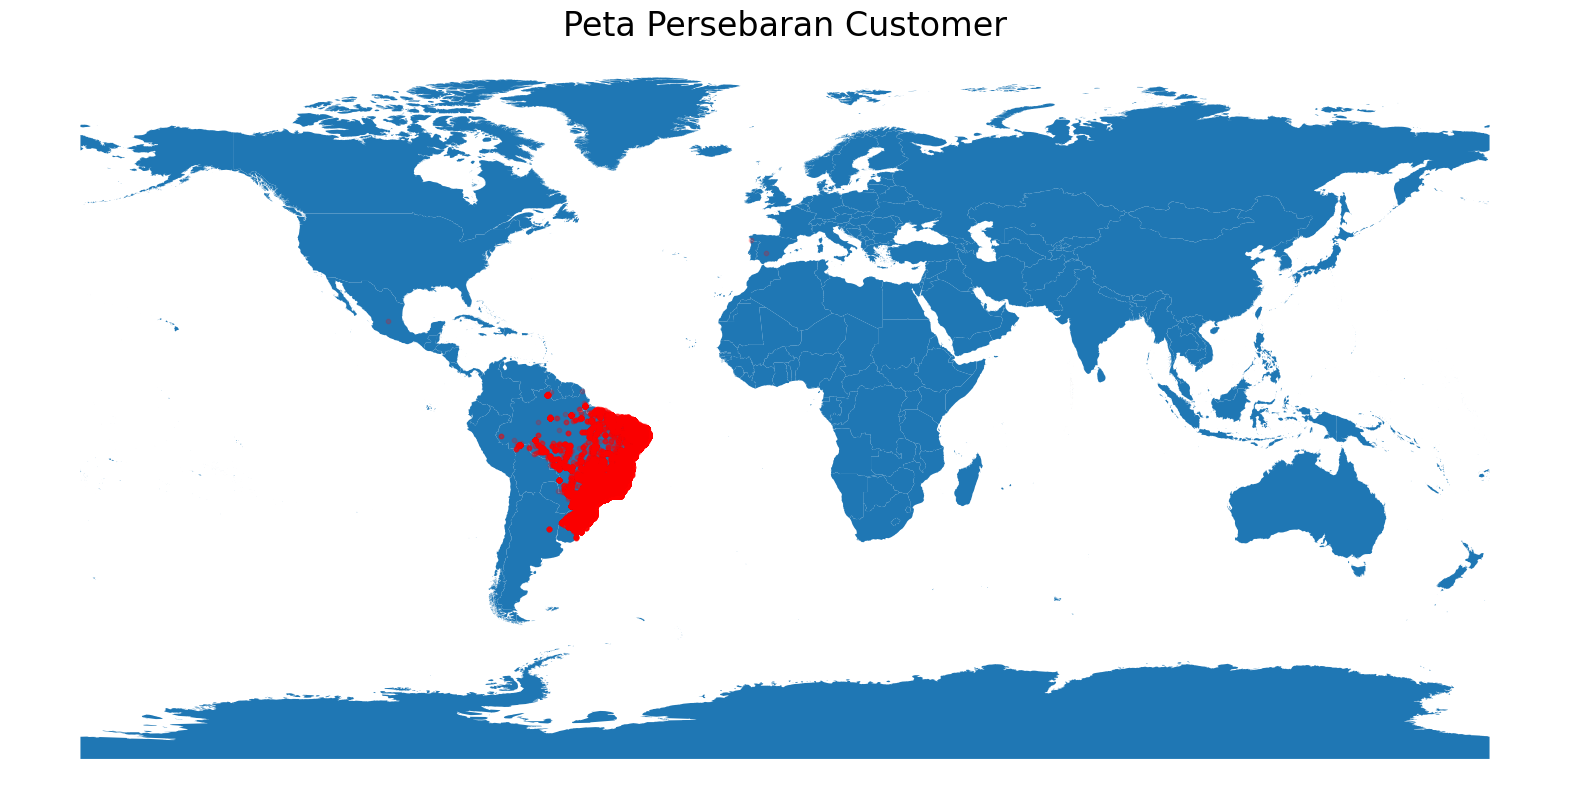

In [157]:
street_map = gpd.read_file('/content/ne_10m_admin_0_countries.shp')
ax = street_map.plot(figsize=(20, 20))
plt.axis('off')
gcdf.plot(ax=ax, color="red", alpha=0.2, markersize=10)
plt.title('Peta Persebaran Customer', fontsize=24)
plt.show()

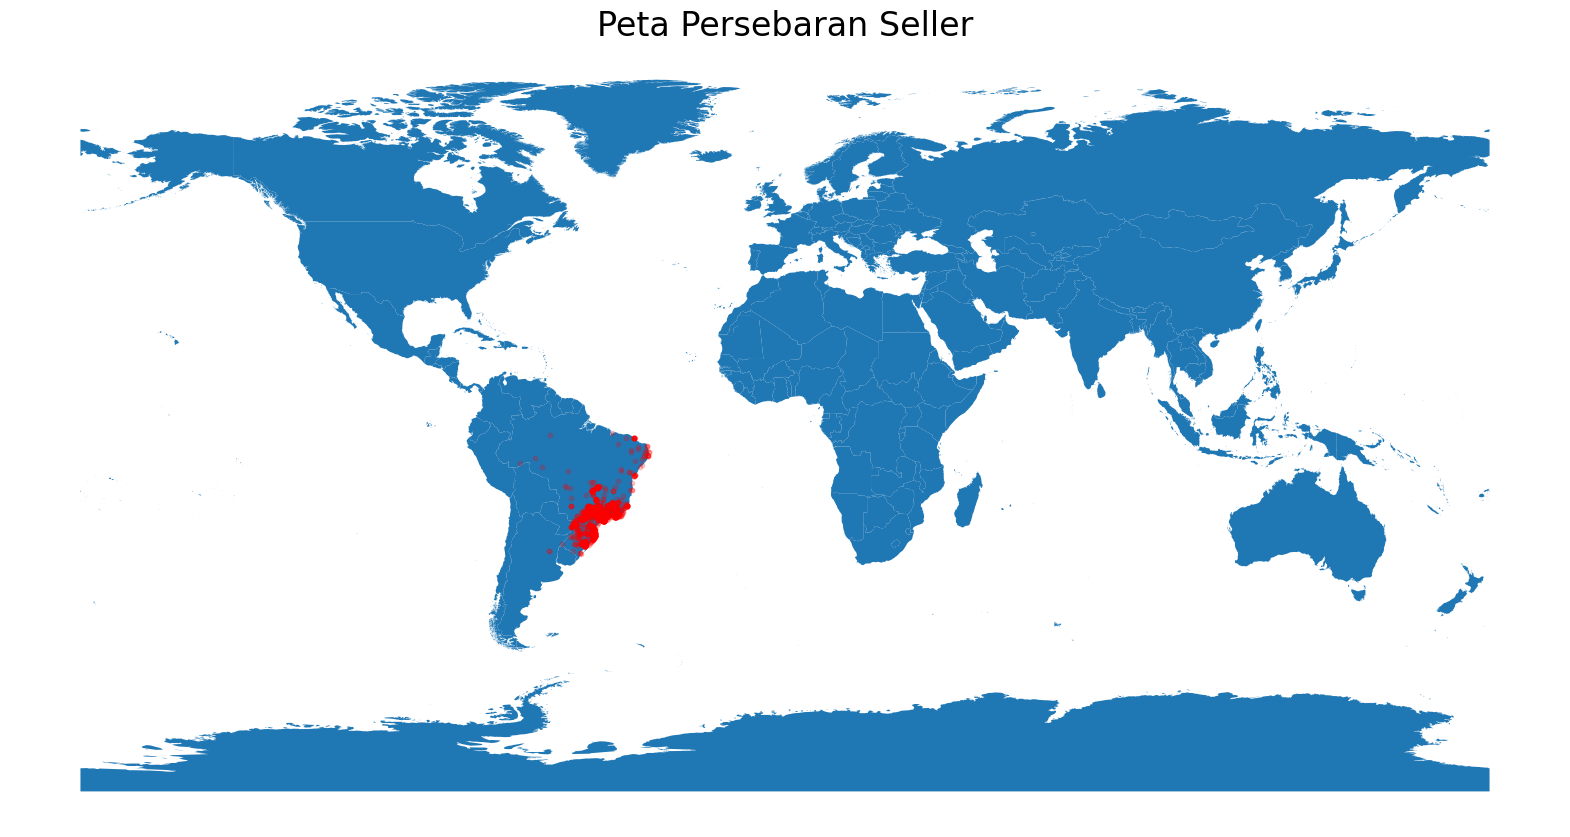

In [158]:
street_map = gpd.read_file('/content/ne_10m_admin_0_countries.shp')
ax = street_map.plot(figsize=(20, 20))
plt.axis('off')
gsdf.plot(ax=ax, color="red", alpha=0.2, markersize=10)
plt.title('Peta Persebaran Seller', fontsize=24)
plt.show()

## Berapa pendapatan tertinggi dan terendah dari seller?

In [159]:
all_data[all_data['price'].round(2) + all_data['freight_value'].round(2) != all_data['payment_value'].round(2)][['order_id', 'product_id', 'seller_id', 'price', 'freight_value', 'payment_value']]

,order_id,product_id,seller_id,price,freight_value,payment_value
7,c9ef97d2854afe64a3b4488bc2836af6,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,18.12,153.75
8,c9ef97d2854afe64a3b4488bc2836af6,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,58.90,17.83,153.75
9,df2d910b8b5e5f461f67043489f9569d,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,35.71,20.00
10,df2d910b8b5e5f461f67043489f9569d,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,35.71,20.00
11,df2d910b8b5e5f461f67043489f9569d,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,35.71,51.61
...,...,...,...,...,...,...
115603,fa752aebeda0a3f9a2626bc507550c3f,7ae1a5d0600076501c7ff50c63938b48,2a167ca73899c85001a837d8fb4962f6,1099.00,34.64,2267.28
115604,fa752aebeda0a3f9a2626bc507550c3f,7ae1a5d0600076501c7ff50c63938b48,2a167ca73899c85001a837d8fb4962f6,1099.00,34.64,2267.28
115605,157de1652c032429a625d034be79eeeb,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,24.99,14.10,39.09
115606,157de1652c032429a625d034be79eeeb,cc696680ea0cefcd5d7d5d928afb8de8,217f005bb37ff3aeef5b2ae1788e75ba,24.99,14.10,39.09


Ketika akan melakukan visualisasi pendapatan seller, saya baru menyadari penyebab bahwa orders item berisi data produk yang dipesan oleh customer sehingga akan ada beberapa data yang memiliki order dan product id sama dengan product id, price, dan freight value berbeda. Begitu juga pada data order payments, dimana 1 order id bisa dilakukan pembayaran beberapa kali dengan metode yang berbeda juga sehingga ada beberapa data yang memiliki order id yang sama/duplikat. Setelah memperhatikan nilai price, freight value, dan payment value dengan seksama, saya berasumsi bahwa jika kita jumlahkan price dan freight value untuk order id yang sama, nilainya akan sama dengan jumlah payment value untuk order id yang sama.

In [160]:
ord_pay_temp = order_payments_data.copy()
sum_ord_pay_temp = ord_pay_temp.groupby('order_id').sum()[['payment_value']].reset_index()
sum_ord_pay_temp

<ipython-input-160-d6833c303019>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_ord_pay_temp = ord_pay_temp.groupby('order_id').sum()[['payment_value']].reset_index()


,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


Tabel di atas berisi jumlah payment value untuk setiap order id

In [161]:
ord_itm_temp = order_items_data.copy()
ord_itm_temp['total_spend'] = ord_itm_temp['price'].values + ord_itm_temp['freight_value'].values
sum_ord_itm_temp = ord_itm_temp.groupby('order_id').sum()[['total_spend']].reset_index()
sum_ord_itm_temp

<ipython-input-161-310e930c54ac>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_ord_itm_temp = ord_itm_temp.groupby('order_id').sum()[['total_spend']].reset_index()


,order_id,total_spend
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,386.53
98663,fffce4705a9662cd70adb13d4a31832d,116.85
98664,fffe18544ffabc95dfada21779c9644f,64.71


Untuk tabel di atas, menunjukkan total_spend yang didapat dari price + freight_value pada tabel order items.

In [162]:
sum_ord_itm_temp[~sum_ord_itm_temp['order_id'].isin(sum_ord_pay_temp['order_id'])]

,order_id,total_spend
73845,bfbd0f9bdef84302105ad712db648a6c,143.46


In [163]:
sum_ord_pay_temp[~sum_ord_pay_temp['order_id'].isin(sum_ord_itm_temp['order_id'])]

,order_id,payment_value
24,0010dedd556712d7bb69a19cb7bbd37a,111.12
229,00a500bc03bc4ec968e574c2553bed4b,555.99
251,00b1cb0320190ca0daa2c88b35206009,0.00
271,00bca4adac549020c1273714d04d0208,111.30
309,00d0ffd14774da775ac832ba8520510f,134.49
...,...,...
98608,fdcca0e15a4d03e3fb89fb14664a3744,29.59
98635,fddbd183387b5c9bcbafbd0fe965301f,40.00
98897,fe87d4b944748f63ca5ed22cc55b6fb6,173.68
98956,feae5ecdf2cc16c1007741be785fe3cd,68.53


Ternyata ada beberapa order id yang tercatat di data order payments, tetapi tidak ada di order items. Selanjutnya, kita gabungkan kedua tabel di atas berdasarkan order id dengan cara inner, agar tidak terlalu banyak nilai null. Lalu digabungkan lagi dengan tabel all_data

In [164]:
temp = sum_ord_itm_temp.merge(sum_ord_pay_temp, how='inner', on='order_id')
temp

,order_id,total_spend,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,218.04
...,...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,343.40,343.40
98661,fffcd46ef2263f404302a634eb57f7eb,386.53,386.53
98662,fffce4705a9662cd70adb13d4a31832d,116.85,116.85
98663,fffe18544ffabc95dfada21779c9644f,64.71,64.71


In [193]:
new_all_data = all_data.sort_values(['customer_id', 'order_estimated_delivery_date']).drop_duplicates('order_id', keep='last').merge(temp, how='inner', on='order_id')
new_all_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y
0,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,1,credit_card,8,...,toys,18500,laranjal paulista,SP,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,114.74,114.74
1,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,1,credit_card,5,...,health_beauty,30494,belo horizonte,MG,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,67.41,67.41
2,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,1,credit_card,10,...,baby,22240,rio de janeiro,RJ,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,195.42,195.42
3,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,1,boleto,1,...,cool_stuff,88115,sao jose,SC,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,179.35,179.35
4,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,1,boleto,1,...,bed_bath_table,14940,ibitinga,SP,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,107.01,107.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,620ddc9fbe3e445676a8e71d4a830821,1,2eb705094d8383cfa50e8965dddc8a7e,0ffa40d54288e4f3499b8780dd0f144f,2018-03-22 01:35:21,78.00,13.91,1,credit_card,6,...,books_general_interest,19013,presidente prudente,SP,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,91.91,91.91
96512,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,2,voucher,1,...,bed_bath_table,8550,poa,SP,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,81.36,81.36
96513,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,1,credit_card,3,...,telephony,1021,sao paulo,SP,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,63.13,63.13
96514,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,1,credit_card,2,...,bed_bath_table,13405,piracicaba,SP,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,214.13,214.13


In [194]:
new_all_data[new_all_data['total_spend'].round(2) != new_all_data['payment_value_y'].round(2)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y
651,faf132fb35b3b3b533a67efbd6e7c02d,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2017-04-28 20:41:37,89.90,25.12,1,credit_card,10,...,bed_bath_table,14940,ibitinga,SP,e9063e00898d88b25add862974ee6e20,64280,campo maior,PI,115.02,130.01
879,1811959f3ced8abc0645c21285a5a4d5,1,f0a7113644fce6d200240a1d0dba2b9b,78c99c6dff4eeae5be99bf635ed21e3f,2017-03-06 19:19:44,55.90,18.67,1,credit_card,5,...,sports_leisure,17510,marilia,SP,fb9760235a090e1747caef67cc951f6c,88704,tubarao,SC,74.57,79.78
972,08af87fbe33eeebc7840433d94718046,3,d902ca64b614964dc31d6b0372e800ac,391fc6631aebcf3004804e51b40bcf1e,2017-04-27 13:10:48,52.30,12.00,1,credit_card,4,...,furniture_decor,14940,ibitinga,SP,926c047356935ed05cb3fbee9ebcac0b,88330,balneario camboriu,SC,296.73,296.72
976,33a7b8ae888999afb219263e9a36fb77,1,58cda2faccdf7f8620e45b6a863efd3f,2d2c62bef4c8ba0dd74e0e228e808539,2018-08-22 13:30:46,148.00,27.34,1,credit_card,10,...,small_appliances_home_oven_and_coffee,14096,ribeirao preto,SP,be4d46b2c26abc0280f42d8325aa54a0,35200,aimores,MG,175.34,198.19
1031,320dcf288de15e4ff06ebbfce4e42c78,2,c9676685ee3aec26dd274549d54b85f6,709e16e2b25c7474d980076c6bfc4806,2018-08-29 08:50:10,31.90,12.87,1,credit_card,3,...,health_beauty,16200,birigui,SP,507f6af076decee5860e7b57d23ca4aa,4547,sao paulo,SP,87.55,81.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96031,6f6141eab1bb4e6c11c31e631b60443a,2,b05ec8d9cabec69e637318ebba813a09,cc63f0dd2acba93ffed4fe9f8e0321fa,2018-08-03 17:05:18,126.99,9.50,1,debit_card,1,...,housewares,15025,sao jose do rio preto,SP,e41c51c28b4854979a6d8eab7ad44e2f,11700,praia grande,SP,272.98,272.97
96183,5f0204c837c9b96a76c8da513f40ab17,2,3bdc103ff400f1e4c1136dfe4ebadbd1,1354d51653f645349064725ed204e85e,2018-08-03 03:50:09,95.00,10.00,1,boleto,1,...,furniture_decor,1230,sao paulo,SP,4adb08de8932929dcf4fb86147020329,25963,teresopolis,RJ,210.00,209.99
96427,c55c2cba4bd6069c80c2531fe9a9188a,2,b623b7cb05ee3248fbe4a6ecbeed79a4,7aa4334be125fcdd2ba64b3180029f14,2017-11-13 04:26:17,70.97,8.88,1,boleto,1,...,toys,18500,laranjal paulista,SP,1d973c98166abefe7b2601c3d959c0c5,25025,duque de caxias,RJ,159.70,159.69
96491,09ec142bfa34576d3914bdf8c19927c2,2,2265e8aa066cc6c4528d4be900eb5b64,e819bcfade7b5d88a27325eb6cfd62c5,2018-07-26 16:44:13,17.90,4.61,1,credit_card,1,...,furniture_decor,7242,guarulhos,SP,19560db94472cdf51948e02929642a0b,3167,sao paulo,SP,70.75,70.76


Ternyata ada beberapa order id yang payment_value tidak sama dengan total_spend. Artinya, pembayaran yang dilakukan customer ada yang lebih besar atau lebih kecil dari harga yang ditunjukkan oleh e-commerce. Untuk menentukan pendapatan dari seller, maka saya menggunakan nilai payment_value, karena nilai tersebut menunjukkan nominal yang dibayarkan oleh costumer dan diterima oleh seller.

In [195]:
sorted_sum_revenue = new_all_data.groupby('seller_id').sum()[['payment_value_y']].reset_index().sort_values('payment_value_y', ascending=False)
sorted_sum_revenue

<ipython-input-195-3a503860718a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_sum_revenue = new_all_data.groupby('seller_id').sum()[['payment_value_y']].reset_index().sort_values('payment_value_y', ascending=False)


,seller_id,payment_value_y
836,4869f7a5dfa277a7dca6462dcf3b52b2,245219.62
1497,7c67e1448b00f6e969d365cea6b010ab,236226.75
990,53243585a1d6dc2643021fd1853d8905,233703.76
860,4a3ca9315b744ce9f8e9374361493884,223582.04
2955,fa1c13f2614d7b5c4749cbc52fecda94,202911.99
...,...,...
677,3ac588cd562971392504a9e17130c40b,19.29
2039,ad14615bdd492b01b0d97922e87cb87f,19.21
848,4965a7002cca77301c82d3f91b82e1a9,16.36
1429,77128dec4bec4878c37ab7d6169d6f26,15.22


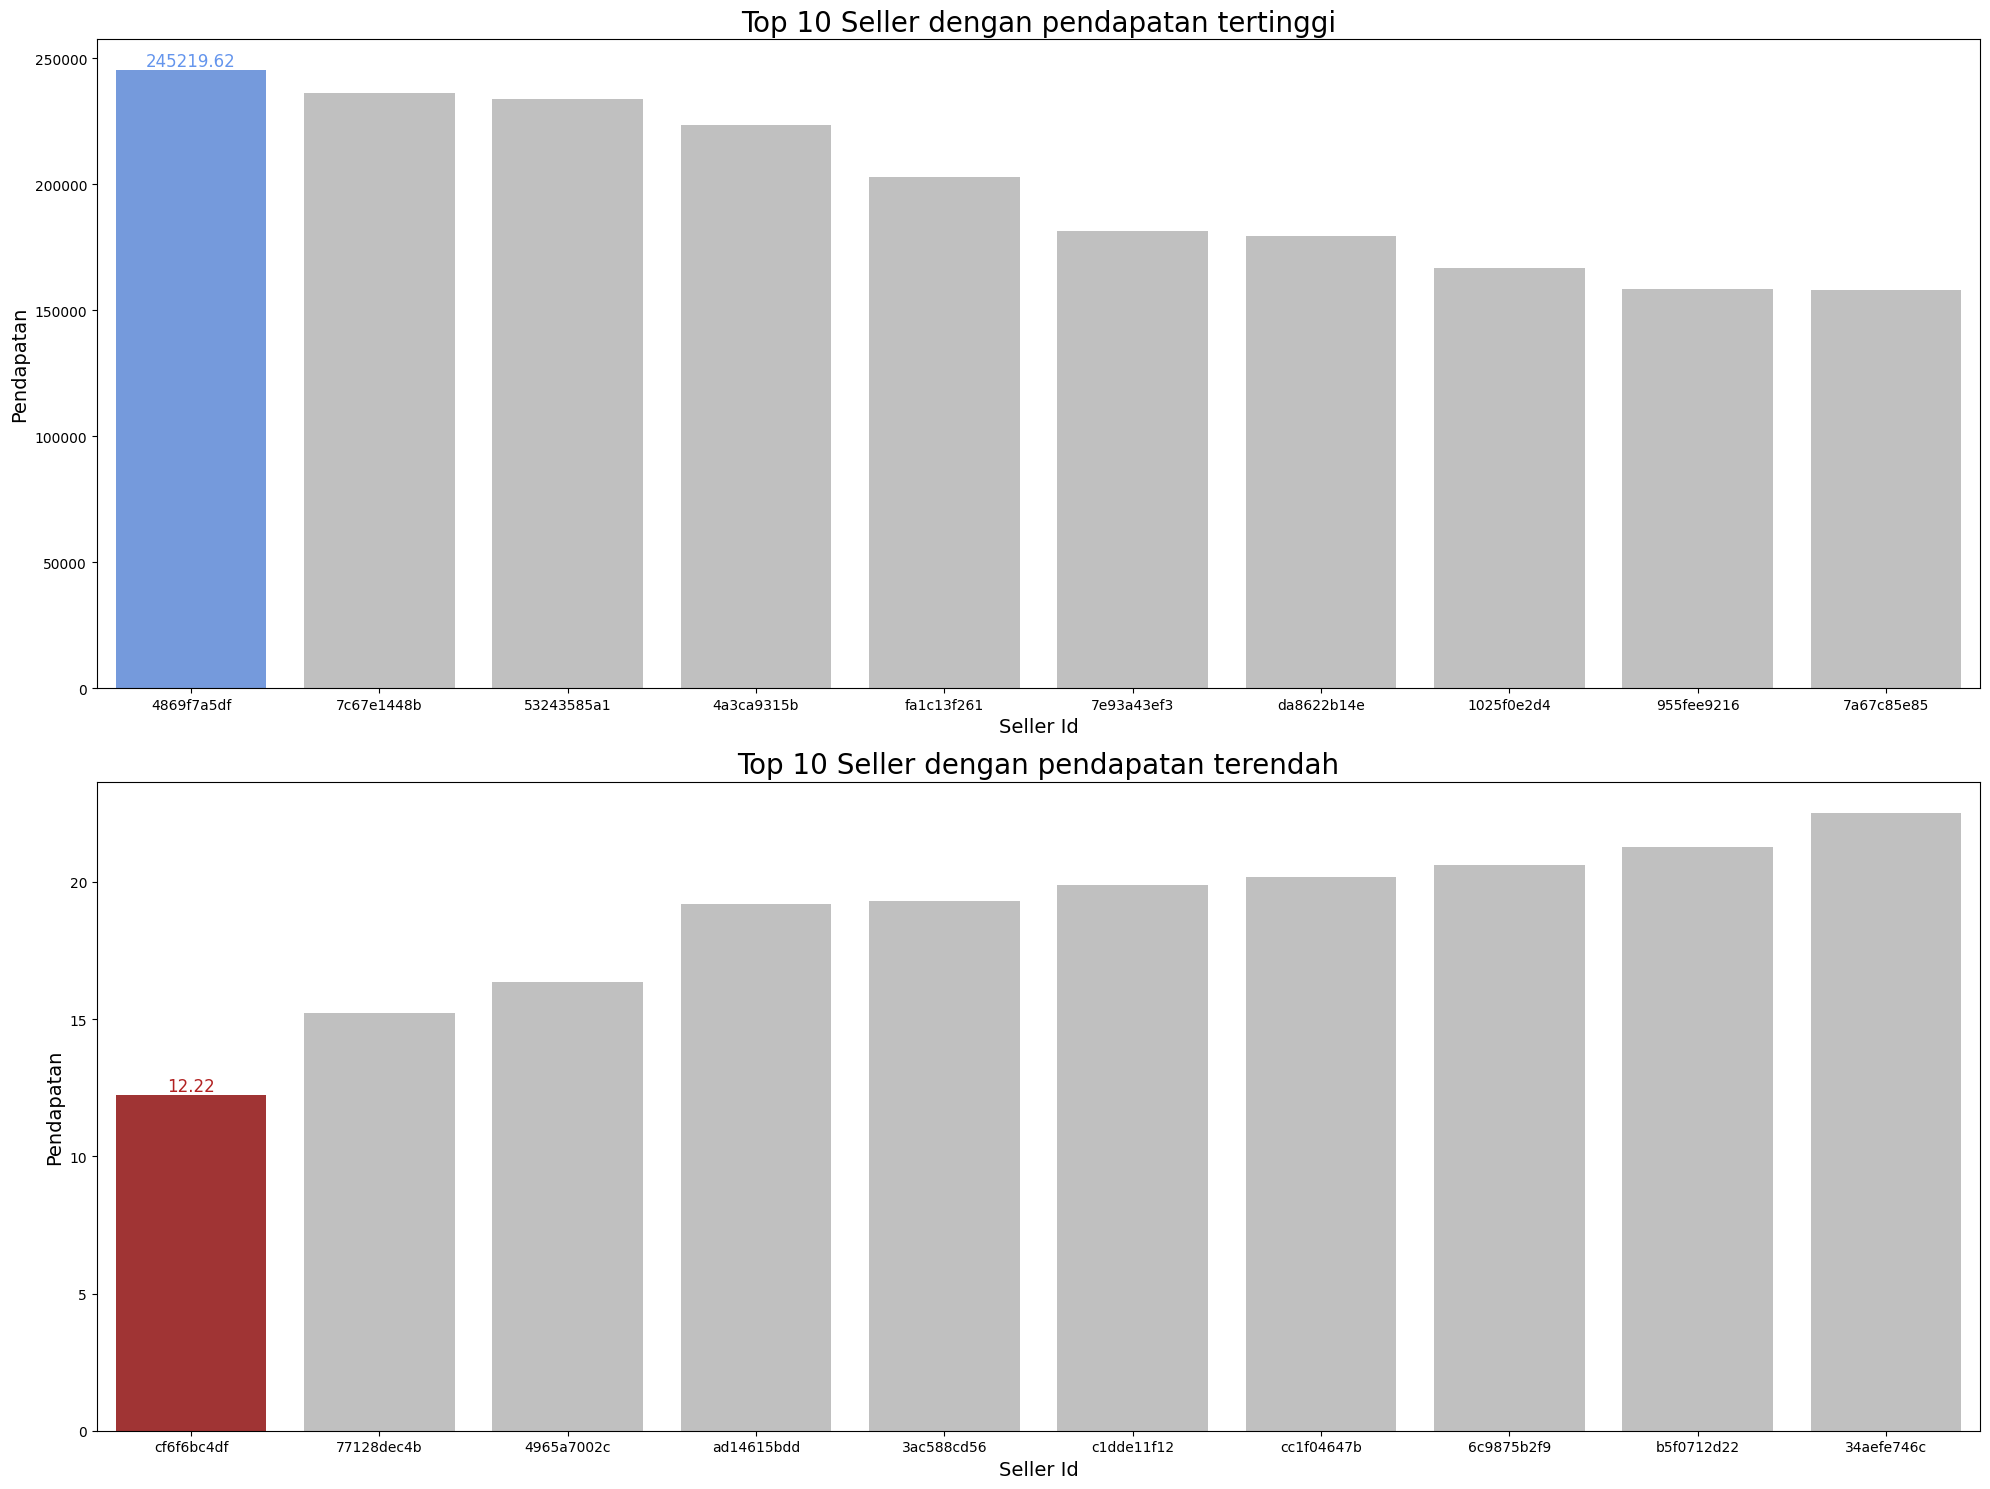

In [196]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
max_value = sorted_sum_revenue['payment_value_y'].head(10).max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in sorted_sum_revenue['payment_value_y'].head(10)]
sns.barplot(x=sorted_sum_revenue['seller_id'].head(10).str[:10],
            y=sorted_sum_revenue['payment_value_y'].head(10),
            palette=colors_high, ax=ax[0])
for i, v in enumerate(sorted_sum_revenue['payment_value_y'].head(10)):
    if v == max_value:
        ax[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax[0].set_xlabel('Seller Id', fontsize=14)
ax[0].set_ylabel('Pendapatan', fontsize=14)
ax[0].set_title('Top 10 Seller dengan pendapatan tertinggi', fontsize=20)

min_value = sorted_sum_revenue['payment_value_y'].tail(10).min()
colors_low = ['silver' if v != min_value else 'firebrick' for v in sorted_sum_revenue['payment_value_y'].tail(10)]
sns.barplot(x=sorted_sum_revenue['seller_id'].tail(10).iloc[::-1].str[:10],
            y=sorted_sum_revenue['payment_value_y'].tail(10).iloc[::-1],
            palette=colors_low[::-1], ax=ax[1])
for i, v in enumerate(sorted_sum_revenue['payment_value_y'].tail(10).iloc[::-1]):
    if v == min_value:
        ax[1].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='firebrick')

ax[1].set_xlabel('Seller Id', fontsize=14)
ax[1].set_ylabel('Pendapatan', fontsize=14)
ax[1].set_title('Top 10 Seller dengan pendapatan terendah', fontsize=20)

plt.tight_layout()

plt.show()

## Berapa nominal tertinggi dan terendah yang dikeluarkan oleh customer?

In [197]:
sorted_sum_spend = new_all_data.groupby('customer_id').sum()[['total_spend']].reset_index().sort_values('total_spend', ascending=False)
sorted_sum_spend

<ipython-input-197-44872ebfb2e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sorted_sum_spend = new_all_data.groupby('customer_id').sum()[['total_spend']].reset_index().sort_values('total_spend', ascending=False)


,customer_id,total_spend
8316,1617b1357756262bfa56ab541c47bc16,13664.08
89283,ec5b2ba62e574342386871631fafd3fc,7274.88
75271,c6e2731c5b391845f6800c97401a43a9,6929.31
24098,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
2010,05455dfa7cd02f13d132aa7a6a9729c6,6081.54
...,...,...
79715,d2c63ad286e3ca9dd69218008d61ff81,11.62
1693,046f890135acc703faff4c1fc0c2d73c,11.56
53573,8e4bd65db637116b6b68109e4df21b84,10.89
9208,184e8e8e48937145eb96c721ef1f0747,10.07


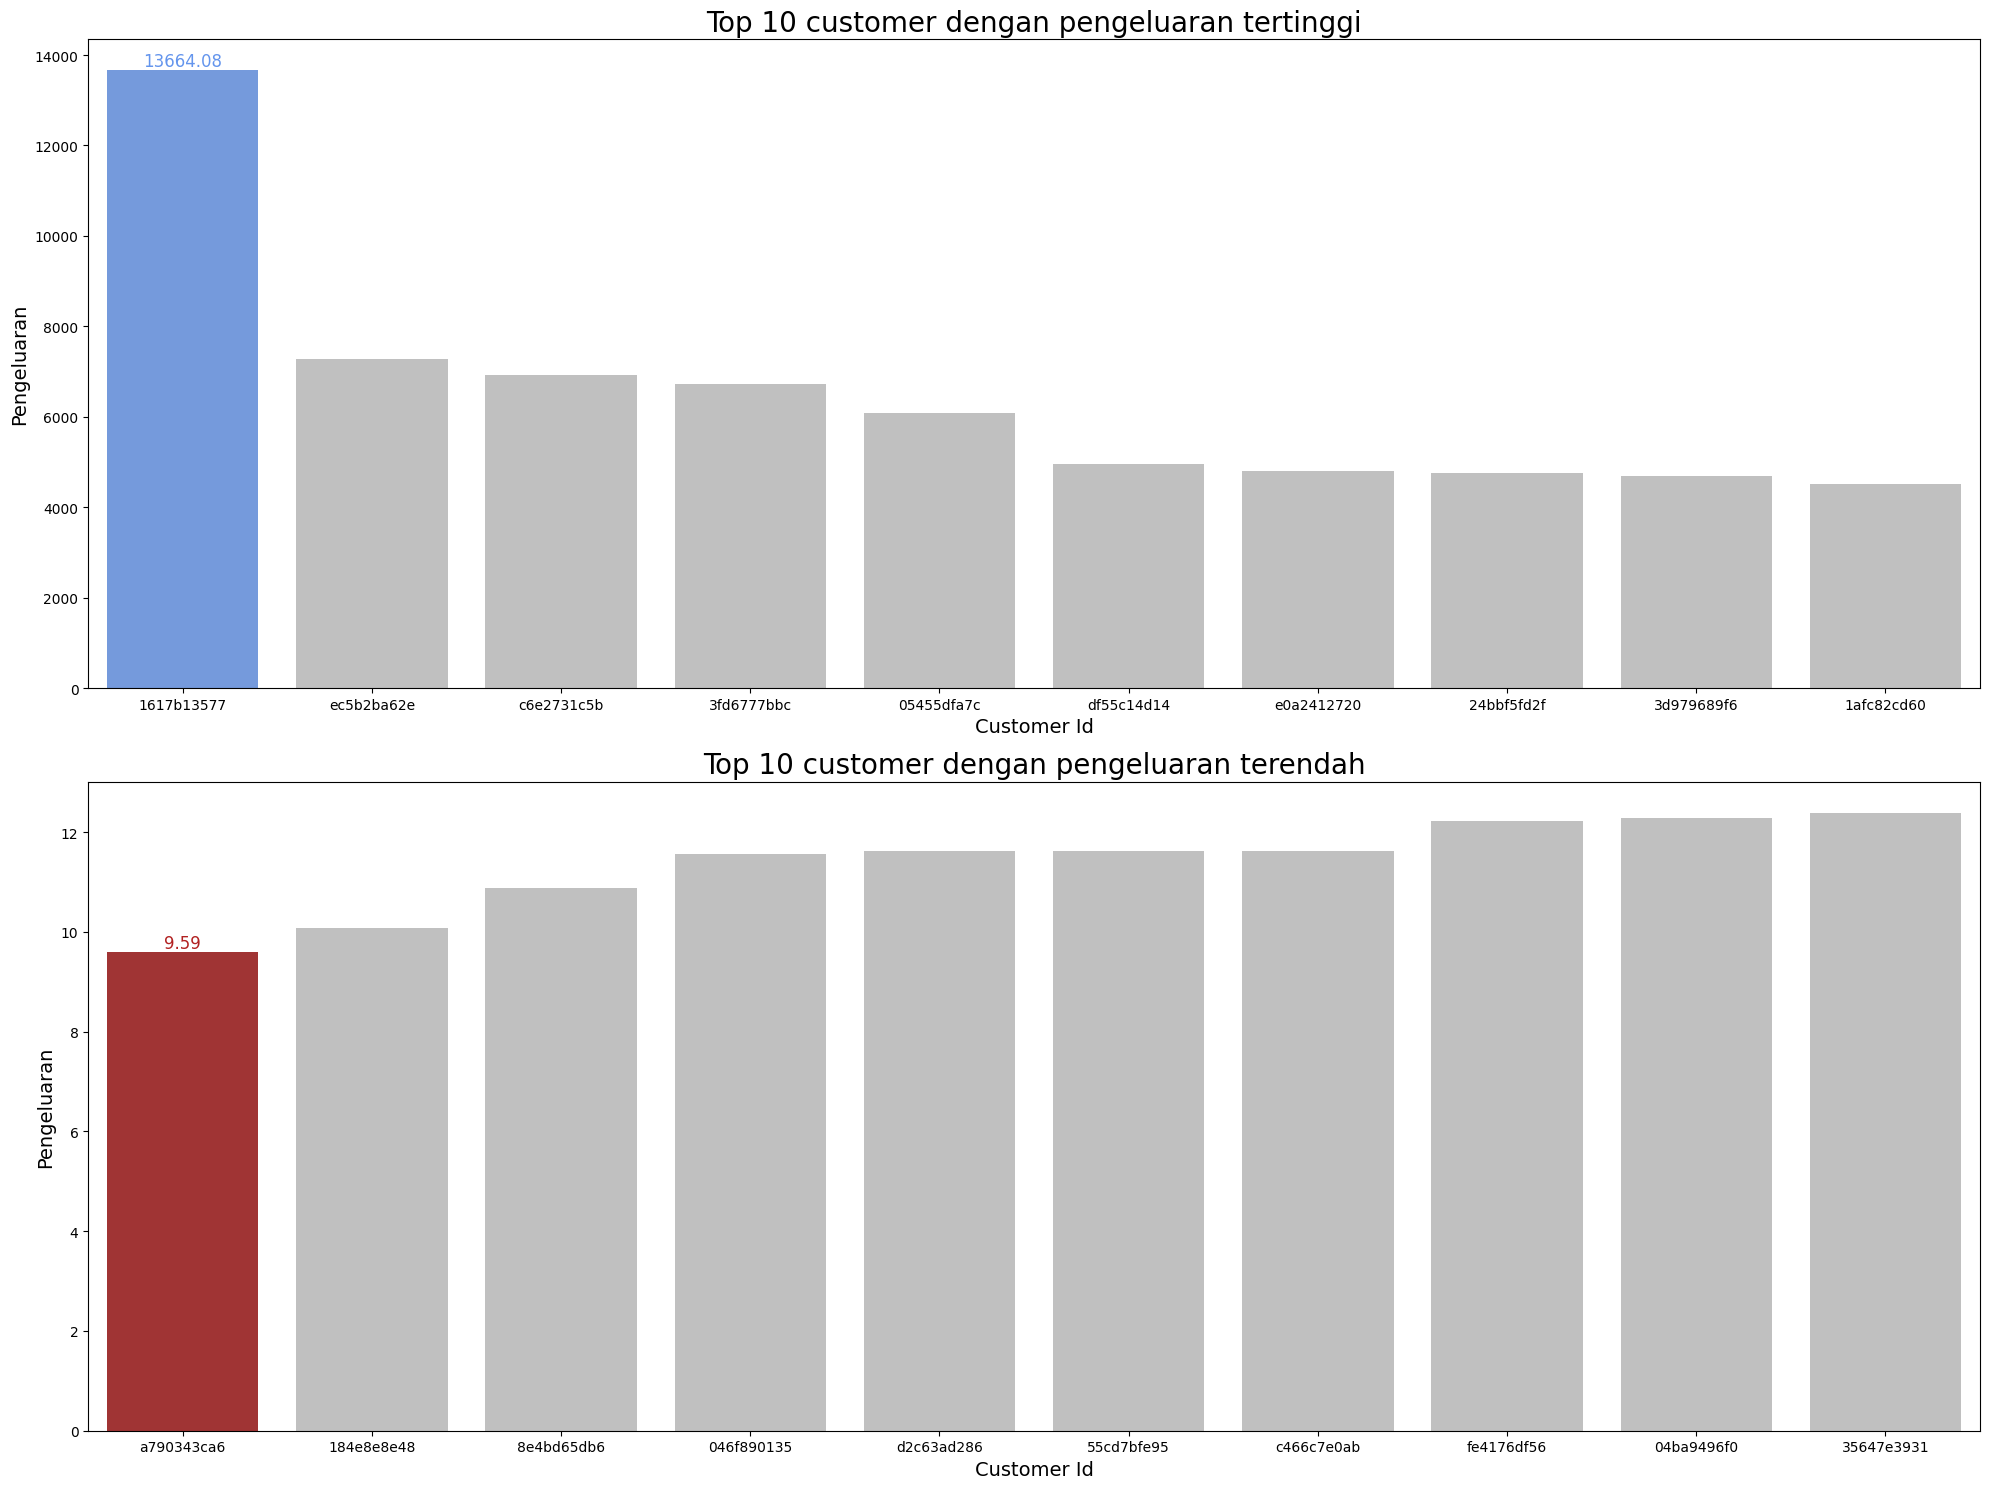

In [198]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
max_value = sorted_sum_spend['total_spend'].head(10).max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in sorted_sum_spend['total_spend'].head(10)]
sns.barplot(x=sorted_sum_spend['customer_id'].head(10).str[:10],
            y=sorted_sum_spend['total_spend'].head(10),
            palette=colors_high, ax=ax[0])
for i, v in enumerate(sorted_sum_spend['total_spend'].head(10)):
    if v == max_value:
        ax[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax[0].set_xlabel('Customer Id', fontsize=14)
ax[0].set_ylabel('Pengeluaran', fontsize=14)
ax[0].set_title('Top 10 customer dengan pengeluaran tertinggi', fontsize=20)

min_value = sorted_sum_spend['total_spend'].tail(10).min()
colors_low = ['silver' if v != min_value else 'firebrick' for v in sorted_sum_spend['total_spend'].tail(10)]
sns.barplot(x=sorted_sum_spend['customer_id'].tail(10).iloc[::-1].str[:10],
            y=sorted_sum_spend['total_spend'].tail(10).iloc[::-1],
            palette=colors_low[::-1], ax=ax[1])
for i, v in enumerate(sorted_sum_spend['total_spend'].tail(10).iloc[::-1]):
    if v == min_value:
        ax[1].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='firebrick')

ax[1].set_xlabel('Customer Id', fontsize=14)
ax[1].set_ylabel('Pengeluaran', fontsize=14)
ax[1].set_title('Top 10 customer dengan pengeluaran terendah', fontsize=20)

plt.tight_layout()

plt.show()

## Barang apa yang paling banyak dan sedikit terjual?

In [199]:
sorted_count_prod = new_all_data.groupby('product_category_name_english').count()[['order_id']].reset_index().sort_values('order_id', ascending=False)
sorted_count_prod

,product_category_name_english,order_id
7,bed_bath_table,9200
43,health_beauty,8735
65,sports_leisure,7637
15,computers_accessories,6624
39,furniture_decor,6256
...,...,...
3,arts_and_craftmanship,23
52,la_cuisine,12
11,cds_dvds_musicals,12
29,fashion_childrens_clothes,8


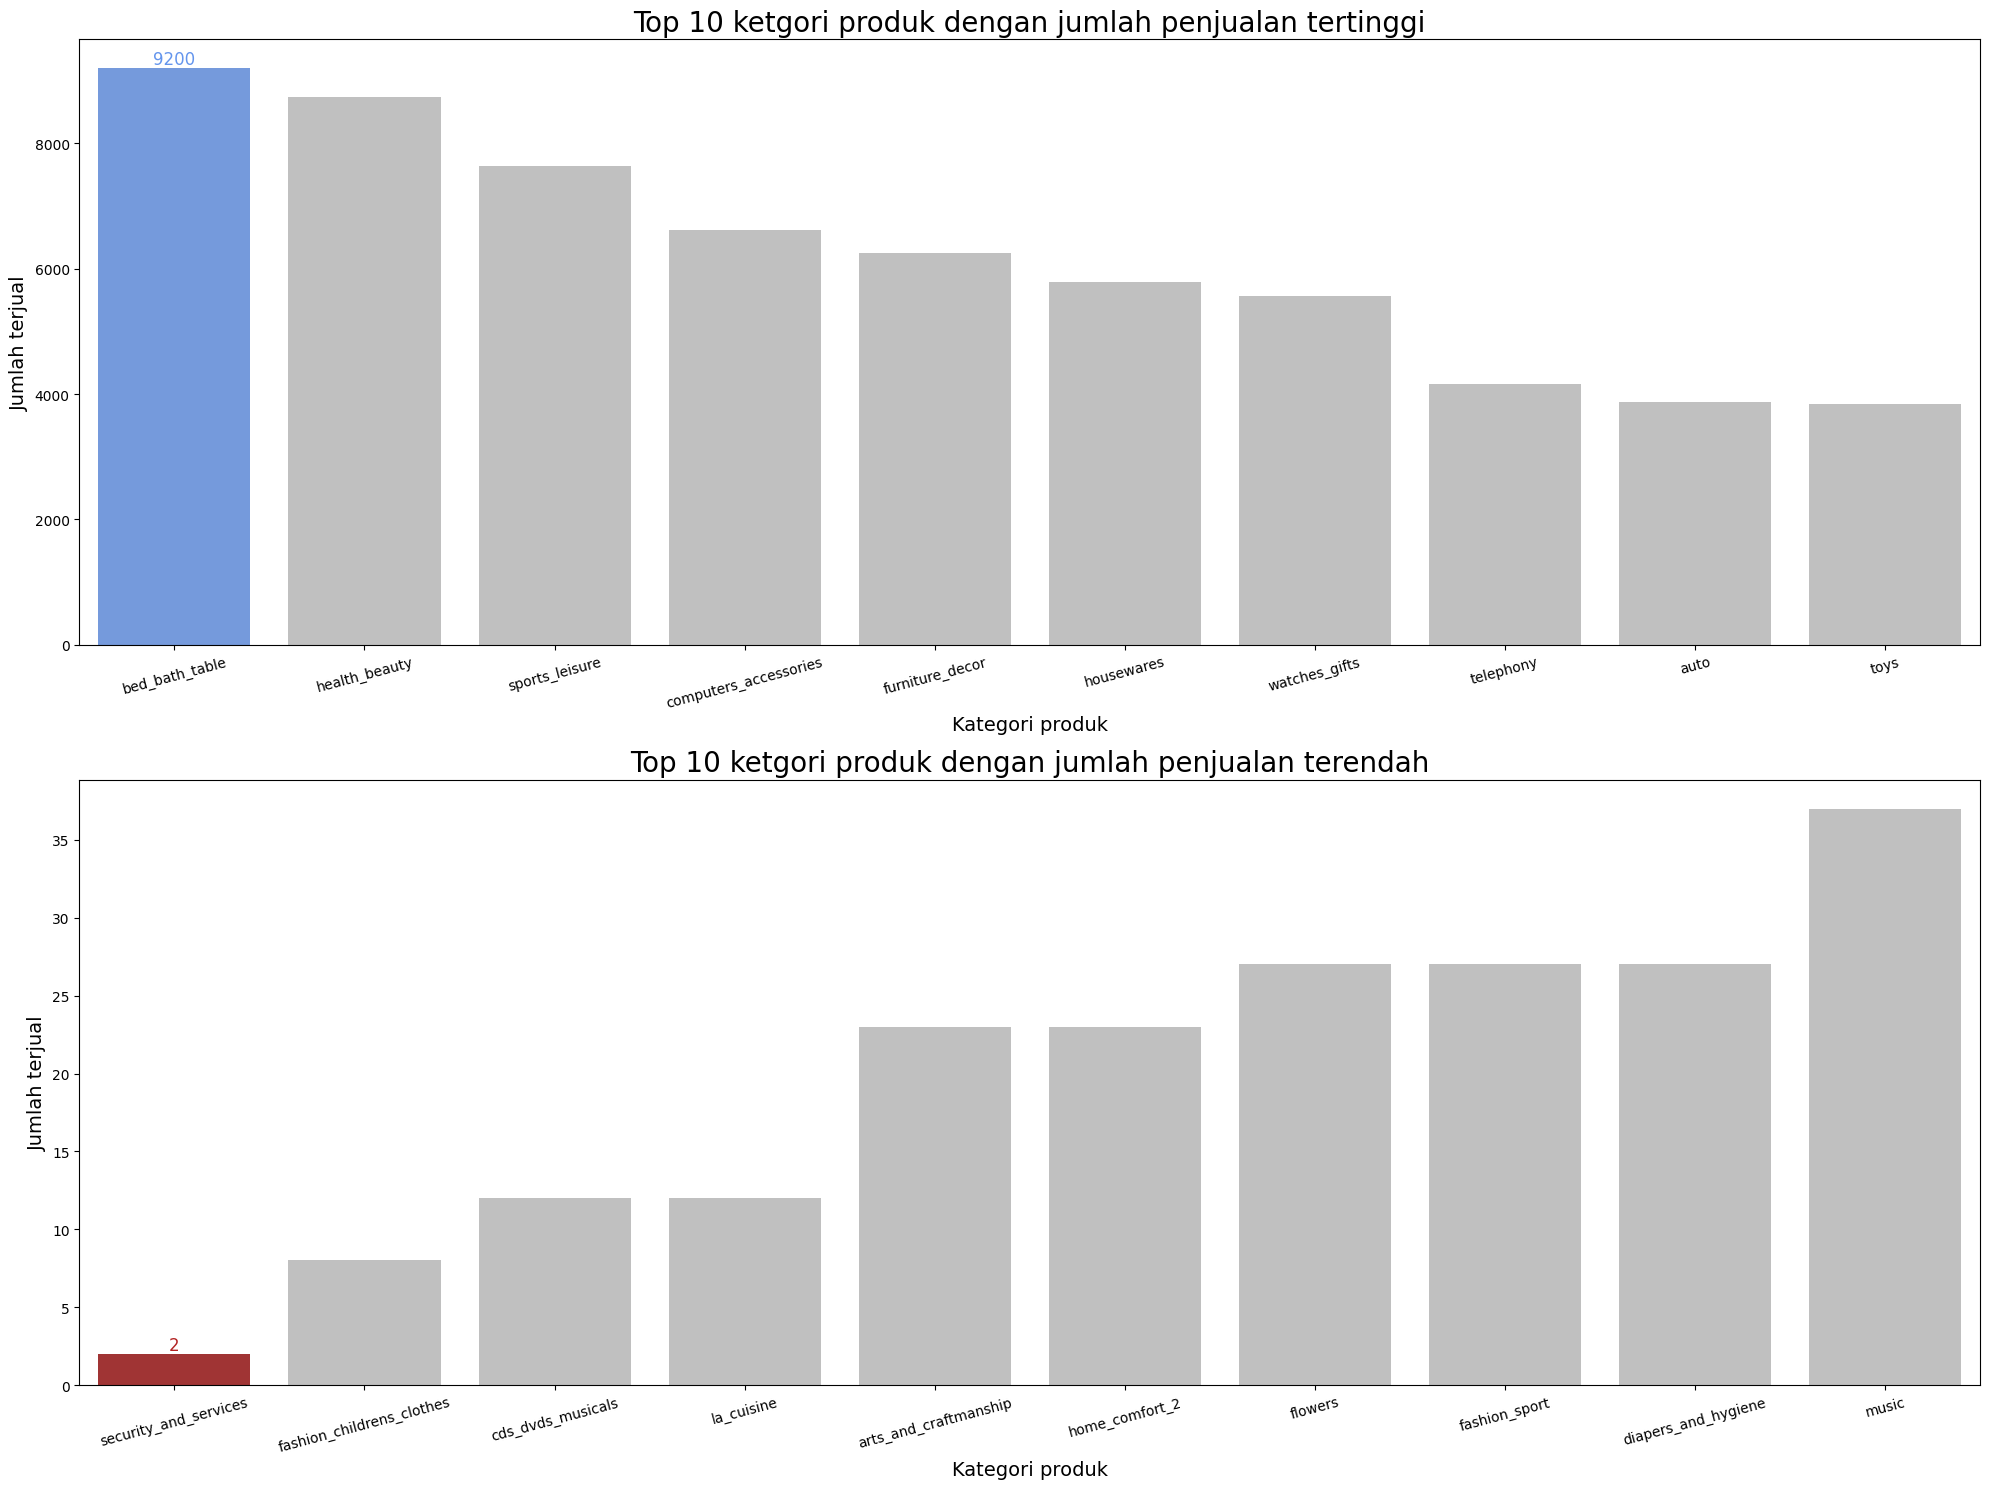

In [200]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
max_value = sorted_count_prod['order_id'].head(10).max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in sorted_count_prod['order_id'].head(10)]
sns.barplot(x=sorted_count_prod['product_category_name_english'].head(10),
            y=sorted_count_prod['order_id'].head(10),
            palette=colors_high, ax=ax[0])
for i, v in enumerate(sorted_count_prod['order_id'].head(10)):
    if v == max_value:
        ax[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax[0].set_xlabel('Kategori produk', fontsize=14)
ax[0].set_ylabel('Jumlah terjual', fontsize=14)
ax[0].set_title('Top 10 ketgori produk dengan jumlah penjualan tertinggi', fontsize=20)
ax[0].tick_params(axis='x', labelrotation=15)

min_value = sorted_count_prod['order_id'].tail(10).min()
colors_low = ['silver' if v != min_value else 'firebrick' for v in sorted_count_prod['order_id'].tail(10)]
sns.barplot(x=sorted_count_prod['product_category_name_english'].tail(10).iloc[::-1],
            y=sorted_count_prod['order_id'].tail(10).iloc[::-1],
            palette=colors_low[::-1], ax=ax[1])
for i, v in enumerate(sorted_count_prod['order_id'].tail(10).iloc[::-1]):
    if v == min_value:
        ax[1].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='firebrick')

ax[1].set_xlabel('Kategori produk', fontsize=14)
ax[1].set_ylabel('Jumlah terjual', fontsize=14)
ax[1].set_title('Top 10 ketgori produk dengan jumlah penjualan terendah', fontsize=20)
ax[1].tick_params(axis='x', labelrotation=15)

plt.tight_layout()

plt.show()

## Bagaimana tingkat penjualan di setiap bulan?

In [201]:
revenue_by_month = new_all_data.dropna(subset='order_delivered_customer_date')
revenue_by_month['year'] = revenue_by_month['order_delivered_customer_date'].dt.year
revenue_by_month['month'] = revenue_by_month['order_delivered_customer_date'].dt.month
revenue_by_month

<ipython-input-201-ed7984078d48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_by_month['year'] = revenue_by_month['order_delivered_customer_date'].dt.year
<ipython-input-201-ed7984078d48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_by_month['month'] = revenue_by_month['order_delivered_customer_date'].dt.month


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y,year,month
0,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,1,credit_card,8,...,laranjal paulista,SP,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,114.74,114.74,2017,11
1,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,1,credit_card,5,...,belo horizonte,MG,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,67.41,67.41,2017,7
2,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,1,credit_card,10,...,rio de janeiro,RJ,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,195.42,195.42,2017,3
3,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,1,boleto,1,...,sao jose,SC,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,179.35,179.35,2017,9
4,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,1,boleto,1,...,ibitinga,SP,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,107.01,107.01,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,620ddc9fbe3e445676a8e71d4a830821,1,2eb705094d8383cfa50e8965dddc8a7e,0ffa40d54288e4f3499b8780dd0f144f,2018-03-22 01:35:21,78.00,13.91,1,credit_card,6,...,presidente prudente,SP,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,91.91,91.91,2018,3
96512,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,2,voucher,1,...,poa,SP,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,81.36,81.36,2018,4
96513,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,1,credit_card,3,...,sao paulo,SP,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,63.13,63.13,2018,6
96514,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,1,credit_card,2,...,piracicaba,SP,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,214.13,214.13,2018,6


In [202]:
# count_order_by_month = revenue_by_month.groupby(['year', 'month']).count()[['order_id']].reset_index().sort_values(['year', 'month'])
# count_order_by_month
count_order_by_month = revenue_by_month.groupby(['year', 'month']).agg({
    'order_id': 'count',
    'payment_value_y': 'sum'
}).reset_index().sort_values(['year', 'month'])
count_order_by_month

,year,month,order_id,payment_value_y
0,2016,10,205,34336.40
1,2016,11,58,11341.77
2,2016,12,3,696.77
3,2017,1,279,38348.22
4,2017,2,1299,217714.27
5,2017,3,2316,376597.86
6,2017,4,1794,297985.22
7,2017,5,3645,585195.55
8,2017,6,3126,485389.37
9,2017,7,3382,523362.62


In [203]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_label = [f'{months[i-1]} {j}' for i, j in zip(count_order_by_month['month'], count_order_by_month['year'])]

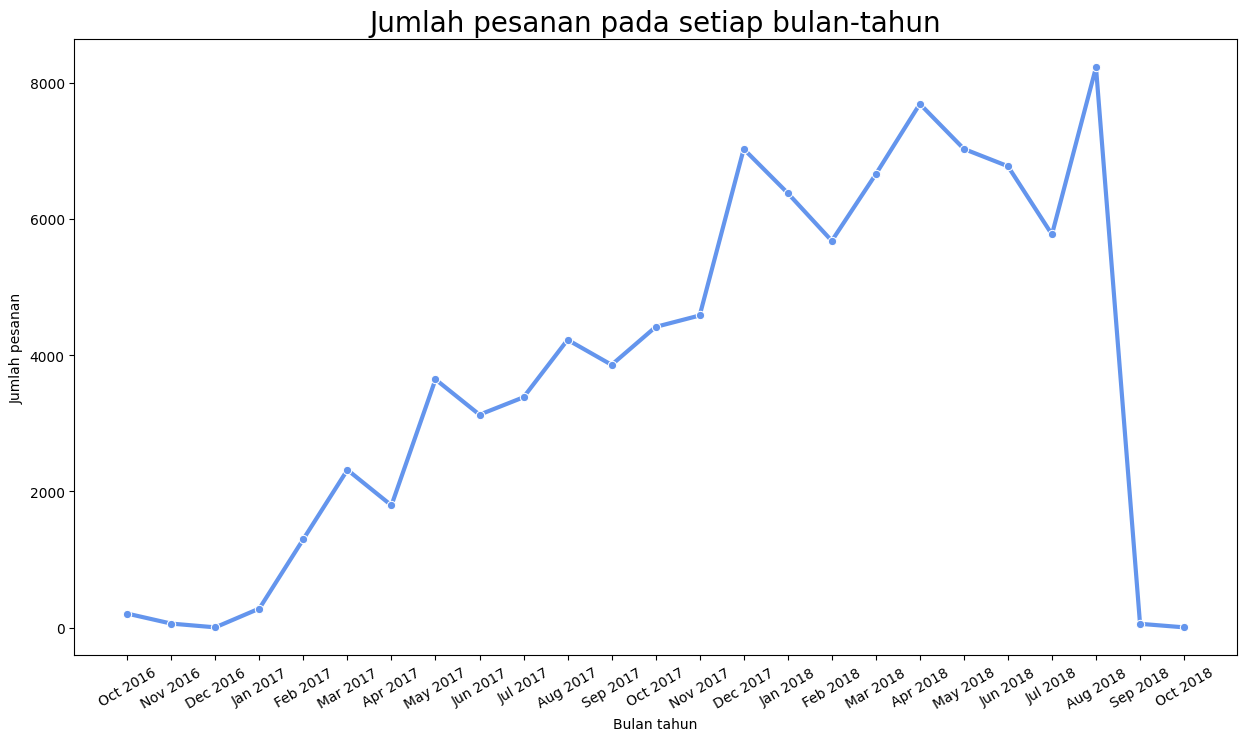

In [204]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=x_label, y=count_order_by_month["order_id"], marker="o", linewidth=3, color='cornflowerblue')
plt.xticks(rotation=30)
plt.title('Jumlah pesanan pada setiap bulan-tahun', fontsize=20)
plt.ylabel('Jumlah pesanan')
plt.xlabel('Bulan tahun')
plt.show()

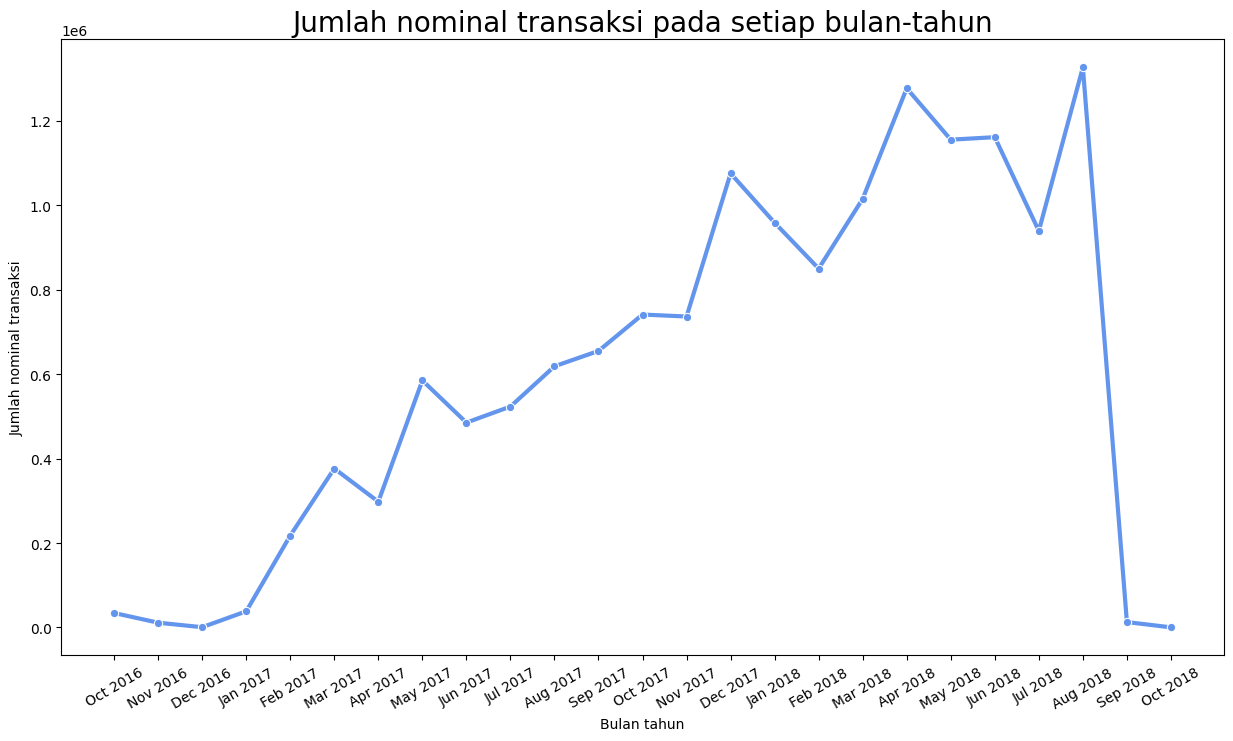

In [205]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=x_label, y=count_order_by_month["payment_value_y"], marker="o", linewidth=3, color='cornflowerblue')
plt.xticks(rotation=30)
plt.title('Jumlah nominal transaksi pada setiap bulan-tahun', fontsize=20)
plt.ylabel('Jumlah nominal transaksi')
plt.xlabel('Bulan tahun')
plt.show()

## Bagaimana umumnya para customer membayar setiap pesanannya?

In [206]:
count_method_payment = all_data.groupby('payment_type').count()[['order_id']].reset_index().sort_values('order_id', ascending=False)
count_method_payment

,payment_type,order_id
1,credit_card,85278
0,boleto,22510
3,voucher,6162
2,debit_card,1659


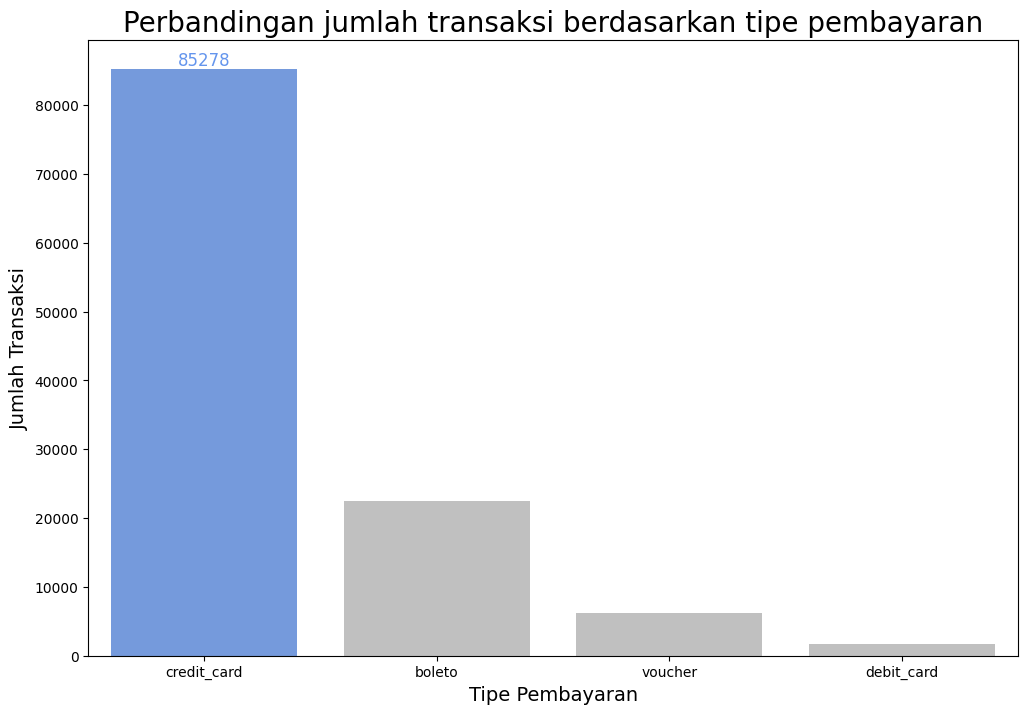

In [207]:
plt.figure(figsize=(12, 8))
max_value = count_method_payment['order_id'].max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in count_method_payment['order_id']]
ax = sns.barplot(x=count_method_payment['payment_type'],
            y=count_method_payment['order_id'],
            palette=colors_high)
for i, v in enumerate(count_method_payment['order_id']):
    if v == max_value:
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax.set_xlabel('Tipe Pembayaran', fontsize=14)
ax.set_ylabel('Jumlah Transaksi', fontsize=14)
ax.set_title('Perbandingan jumlah transaksi berdasarkan tipe pembayaran', fontsize=20)

plt.show()

## Bagaimana rata-rata selisih waktu dari customer menekan pembelian hingga paket sampai ke customer untuk setiap seller?

In [208]:
new_orders_data = new_all_data.dropna(subset='order_delivered_customer_date')
new_orders_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y
0,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,1,credit_card,8,...,toys,18500,laranjal paulista,SP,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,114.74,114.74
1,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,1,credit_card,5,...,health_beauty,30494,belo horizonte,MG,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,67.41,67.41
2,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,1,credit_card,10,...,baby,22240,rio de janeiro,RJ,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,195.42,195.42
3,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,1,boleto,1,...,cool_stuff,88115,sao jose,SC,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,179.35,179.35
4,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,1,boleto,1,...,bed_bath_table,14940,ibitinga,SP,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,107.01,107.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,620ddc9fbe3e445676a8e71d4a830821,1,2eb705094d8383cfa50e8965dddc8a7e,0ffa40d54288e4f3499b8780dd0f144f,2018-03-22 01:35:21,78.00,13.91,1,credit_card,6,...,books_general_interest,19013,presidente prudente,SP,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,91.91,91.91
96512,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,2,voucher,1,...,bed_bath_table,8550,poa,SP,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,81.36,81.36
96513,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,1,credit_card,3,...,telephony,1021,sao paulo,SP,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,63.13,63.13
96514,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,1,credit_card,2,...,bed_bath_table,13405,piracicaba,SP,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,214.13,214.13


In [209]:
new_orders_data['day_difference'] = (new_orders_data['order_delivered_customer_date'] - new_orders_data['order_purchase_timestamp']) / np.timedelta64(1, 'D')
new_orders_data

<ipython-input-209-30d08c060624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_orders_data['day_difference'] = (new_orders_data['order_delivered_customer_date'] - new_orders_data['order_purchase_timestamp']) / np.timedelta64(1, 'D')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y,day_difference
0,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,1,credit_card,8,...,18500,laranjal paulista,SP,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,114.74,114.74,13.981296
1,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,1,credit_card,5,...,30494,belo horizonte,MG,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,67.41,67.41,9.386817
2,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,1,credit_card,10,...,22240,rio de janeiro,RJ,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,195.42,195.42,5.910486
3,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,1,boleto,1,...,88115,sao jose,SC,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,179.35,179.35,28.289375
4,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,1,boleto,1,...,14940,ibitinga,SP,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,107.01,107.01,11.276979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,620ddc9fbe3e445676a8e71d4a830821,1,2eb705094d8383cfa50e8965dddc8a7e,0ffa40d54288e4f3499b8780dd0f144f,2018-03-22 01:35:21,78.00,13.91,1,credit_card,6,...,19013,presidente prudente,SP,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,91.91,91.91,4.770359
96512,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,2,voucher,1,...,8550,poa,SP,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,81.36,81.36,12.014850
96513,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,1,credit_card,3,...,1021,sao paulo,SP,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,63.13,63.13,17.185752
96514,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,1,credit_card,2,...,13405,piracicaba,SP,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,214.13,214.13,5.066667


In [210]:
mean_day_diff = new_orders_data.groupby('seller_id').mean()['day_difference'].reset_index().sort_values('day_difference', ascending=True)
mean_day_diff['day_difference'] = mean_day_diff['day_difference'].round(2)
mean_day_diff

<ipython-input-210-cca67a5a0033>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_day_diff = new_orders_data.groupby('seller_id').mean()['day_difference'].reset_index().sort_values('day_difference', ascending=True)


,seller_id,day_difference
220,139157dd4daa45c25b0807ffff348363,1.21
1095,5e063e85d44b0f5c3e6ec3131103a57e,1.29
1167,6561d6bf844e464b4019442692b40e02,1.43
2182,c04d70d515d15a7e3db3a73320598566,1.45
1191,674207551483fec113276b67b0d871ff,1.87
...,...,...
909,4fb41dff7c50136976d1a5cf004a42e2,66.75
1024,586a871d4f1221763fddb6ceefdeb95e,68.62
1632,8d92f3ea807b89465643c219455e7369,70.84
1643,8e670472e453ba34a379331513d6aab1,86.00


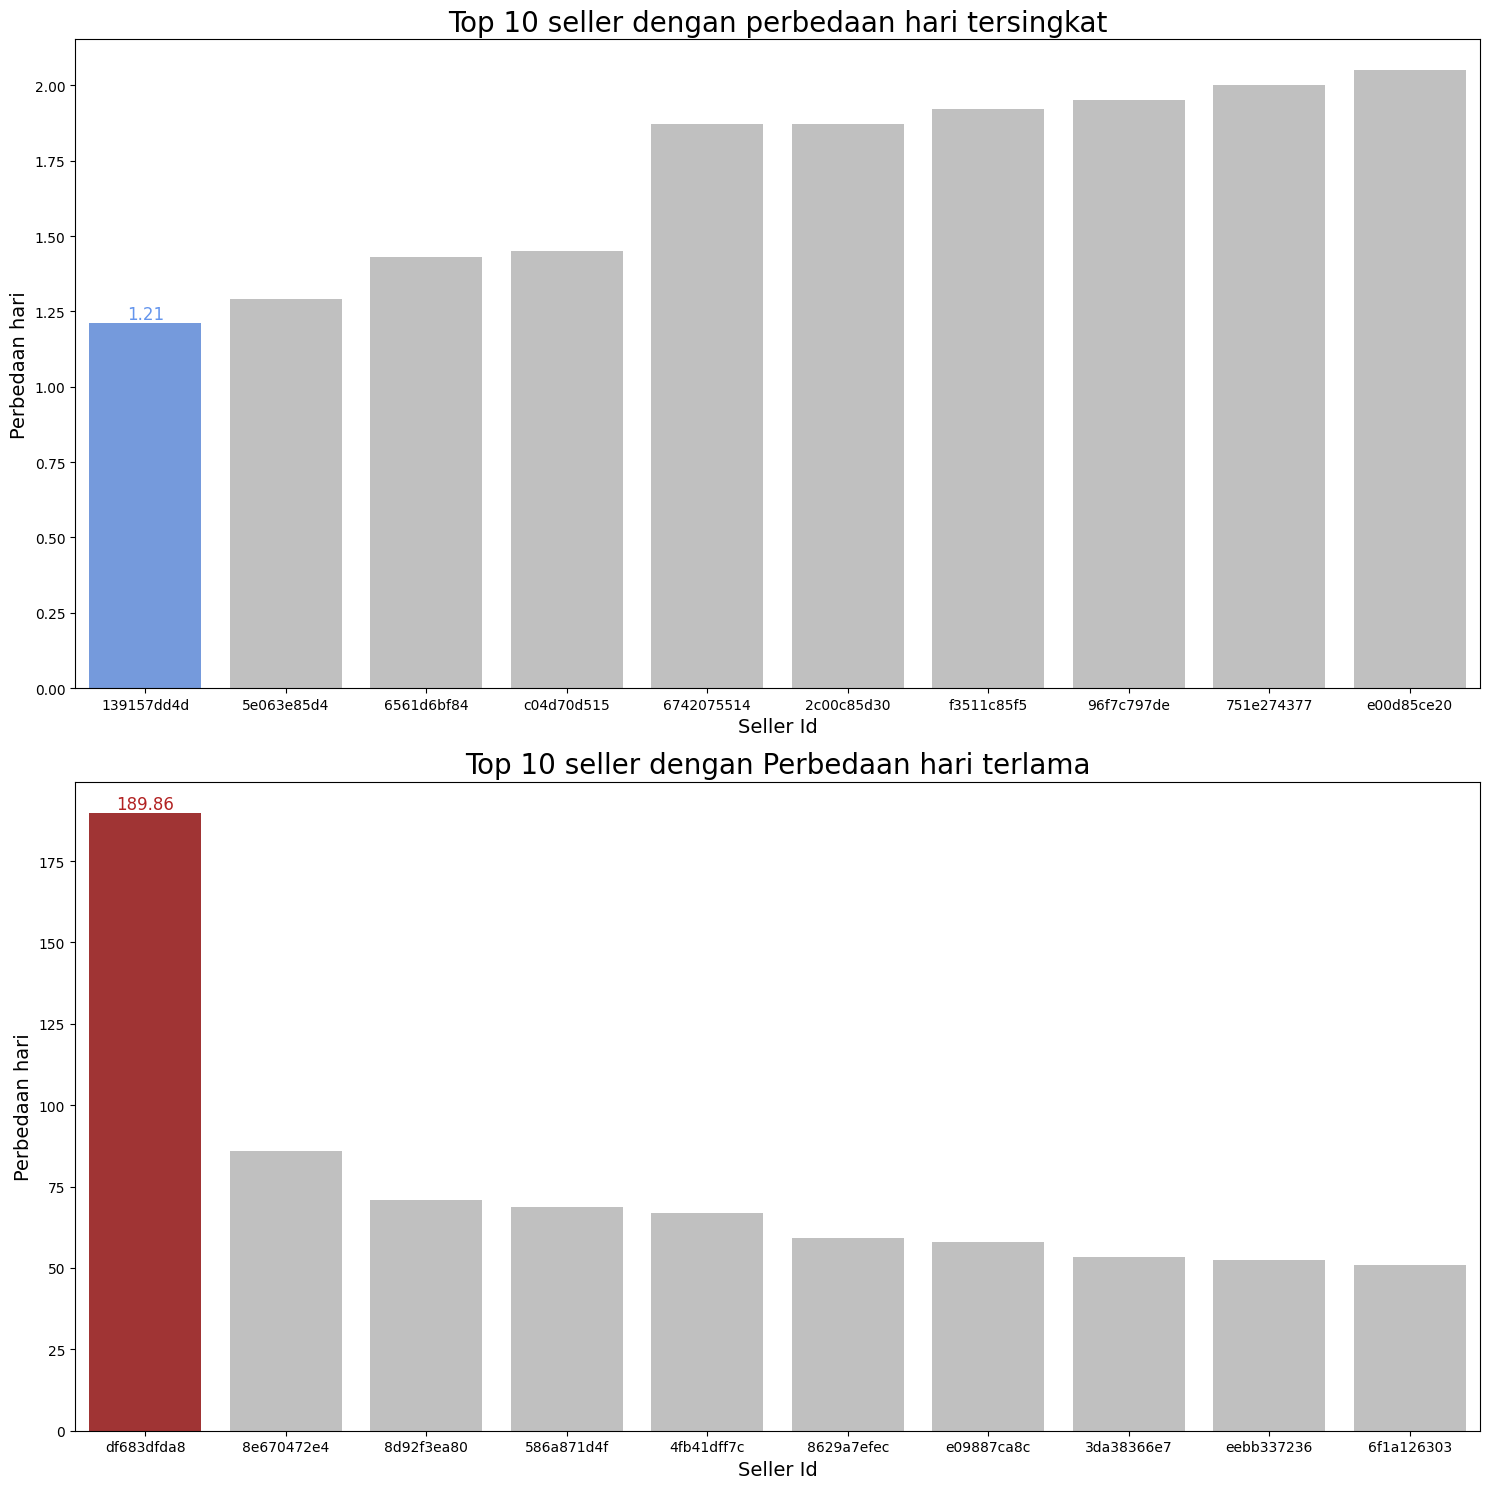

In [211]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
max_value = mean_day_diff['day_difference'].head(10).min()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in mean_day_diff['day_difference'].head(10)]
sns.barplot(x=mean_day_diff['seller_id'].head(10).str[:10],
            y=mean_day_diff['day_difference'].head(10),
            palette=colors_high, ax=ax[0])
for i, v in enumerate(mean_day_diff['day_difference'].head(10)):
    if v == max_value:
        ax[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax[0].set_xlabel('Seller Id', fontsize=14)
ax[0].set_ylabel('Perbedaan hari', fontsize=14)
ax[0].set_title('Top 10 seller dengan perbedaan hari tersingkat', fontsize=20)

min_value = mean_day_diff['day_difference'].tail(10).max()
colors_low = ['silver' if v != min_value else 'firebrick' for v in mean_day_diff['day_difference'].tail(10)]
sns.barplot(x=mean_day_diff['seller_id'].tail(10).iloc[::-1].str[:10],
            y=mean_day_diff['day_difference'].tail(10).iloc[::-1],
            palette=colors_low[::-1], ax=ax[1])
for i, v in enumerate(mean_day_diff['day_difference'].tail(10).iloc[::-1]):
    if v == min_value:
        ax[1].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='firebrick')

ax[1].set_xlabel('Seller Id', fontsize=14)
ax[1].set_ylabel('Perbedaan hari', fontsize=14)
ax[1].set_title('Top 10 seller dengan Perbedaan hari terlama', fontsize=20)

plt.tight_layout()

plt.show()

## Berapa rata-rata selisih waktu tersedikit dan terbanyak paket sampai ke customer dengan estimasi yang ditetapkan untuk setiap seller?

In [212]:
new_orders_data['day_estimated_difference'] = (new_orders_data['order_estimated_delivery_date'] - new_orders_data['order_delivered_customer_date']) / np.timedelta64(1, 'D')
new_orders_data

<ipython-input-212-cc98a59f6faf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_orders_data['day_estimated_difference'] = (new_orders_data['order_estimated_delivery_date'] - new_orders_data['order_delivered_customer_date']) / np.timedelta64(1, 'D')


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_spend,payment_value_y,day_difference,day_estimated_difference
0,5f79b5b0931d63f1a42989eb65b9da6e,1,64315bd8c0c47303179dd2e25b579d00,7aa4334be125fcdd2ba64b3180029f14,2017-11-21 16:35:32,89.80,24.94,1,credit_card,8,...,laranjal paulista,SP,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,114.74,114.74,13.981296,5.346181
1,a44895d095d7e0702b6a162fa2dbeced,1,84183944dc7cddca87a5d384452c1d3c,2a1348e9addc1af5aaa619b1a3679d6b,2017-07-20 09:55:12,54.90,12.51,1,credit_card,5,...,belo horizonte,MG,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,67.41,67.41,9.386817,9.210035
2,316a104623542e4d75189bb372bc5f8d,1,9df2b21ec85378d71df4404712e17478,46dc3b2cc0980fb8ec44634e21d2718e,2017-03-06 11:15:20,179.99,15.43,1,credit_card,10,...,rio de janeiro,RJ,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,195.42,195.42,5.910486,15.626516
3,5825ce2e88d5346438686b0bba99e5ee,1,af3ec22cce878225aae6d9eb6c7a78eb,aafe36600ce604f205b86b5084d3d767,2017-08-23 03:10:27,149.90,29.45,1,boleto,1,...,sao jose,SC,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,179.35,179.35,28.289375,0.162477
4,0ab7fb08086d4af9141453c91878ed7a,1,868b3136c5b206f91b8208fbfdf2cb7c,4a3ca9315b744ce9f8e9374361493884,2018-04-10 03:10:19,93.00,14.01,1,boleto,1,...,ibitinga,SP,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,107.01,107.01,11.276979,4.151991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96511,620ddc9fbe3e445676a8e71d4a830821,1,2eb705094d8383cfa50e8965dddc8a7e,0ffa40d54288e4f3499b8780dd0f144f,2018-03-22 01:35:21,78.00,13.91,1,credit_card,6,...,presidente prudente,SP,bb438f958261edabbe96fc22622499c4,4917,sao paulo,SP,91.91,91.91,4.770359,14.191134
96512,814d6a3a7c0b32b2ad929ac6328124e9,1,c045b19fdb30a3035c56d04c6fe2e622,259f7b5e6e482c230e5bfaa670b6bb8f,2018-04-04 17:10:27,54.90,26.46,2,voucher,1,...,poa,SP,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,81.36,81.36,12.014850,16.277211
96513,8c855550908247a7eff50281b92167a8,1,d5c263f4d651ba657c900ce70a4be7de,dd55f1bb788714a40e7954c3be6df745,2018-05-28 13:54:37,47.90,15.23,1,credit_card,3,...,sao paulo,SP,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,63.13,63.13,17.185752,20.247558
96514,83b5fc912b2862c5046555ded1483ae9,1,e61c78a7343d82c0539d27df0f7dfc31,da8622b14eb17ae2831f4ac5b9dab84a,2018-06-15 17:20:23,199.90,14.23,1,credit_card,2,...,piracicaba,SP,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,214.13,214.13,5.066667,6.227025


In [213]:
mean_day_est_diff = new_orders_data.groupby('seller_id').mean()['day_estimated_difference'].reset_index().sort_values('day_estimated_difference', ascending=False)
mean_day_est_diff['day_estimated_difference'] = mean_day_est_diff['day_estimated_difference'].round(2)
mean_day_est_diff

<ipython-input-213-ce8c88f5e026>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_day_est_diff = new_orders_data.groupby('seller_id').mean()['day_estimated_difference'].reset_index().sort_values('day_estimated_difference', ascending=False)


,seller_id,day_estimated_difference
1696,933446e9a59dece7ae9175103820ca8f,65.32
132,0b09101900100c0e9d312861fad5a1b9,60.84
2841,fa5fdc4e4bb6bd1009ad0e4ac4096562,57.42
2903,ffff564a4f9085cd26170f4732393726,47.55
767,432c67955c0acd1fd6b0b5d678766a71,47.54
...,...,...
1548,8629a7efec1aab257e58cda559f03ba7,-33.81
909,4fb41dff7c50136976d1a5cf004a42e2,-33.82
1643,8e670472e453ba34a379331513d6aab1,-35.71
2550,e09887ca8c7bf8a4621ce481820414ef,-41.77


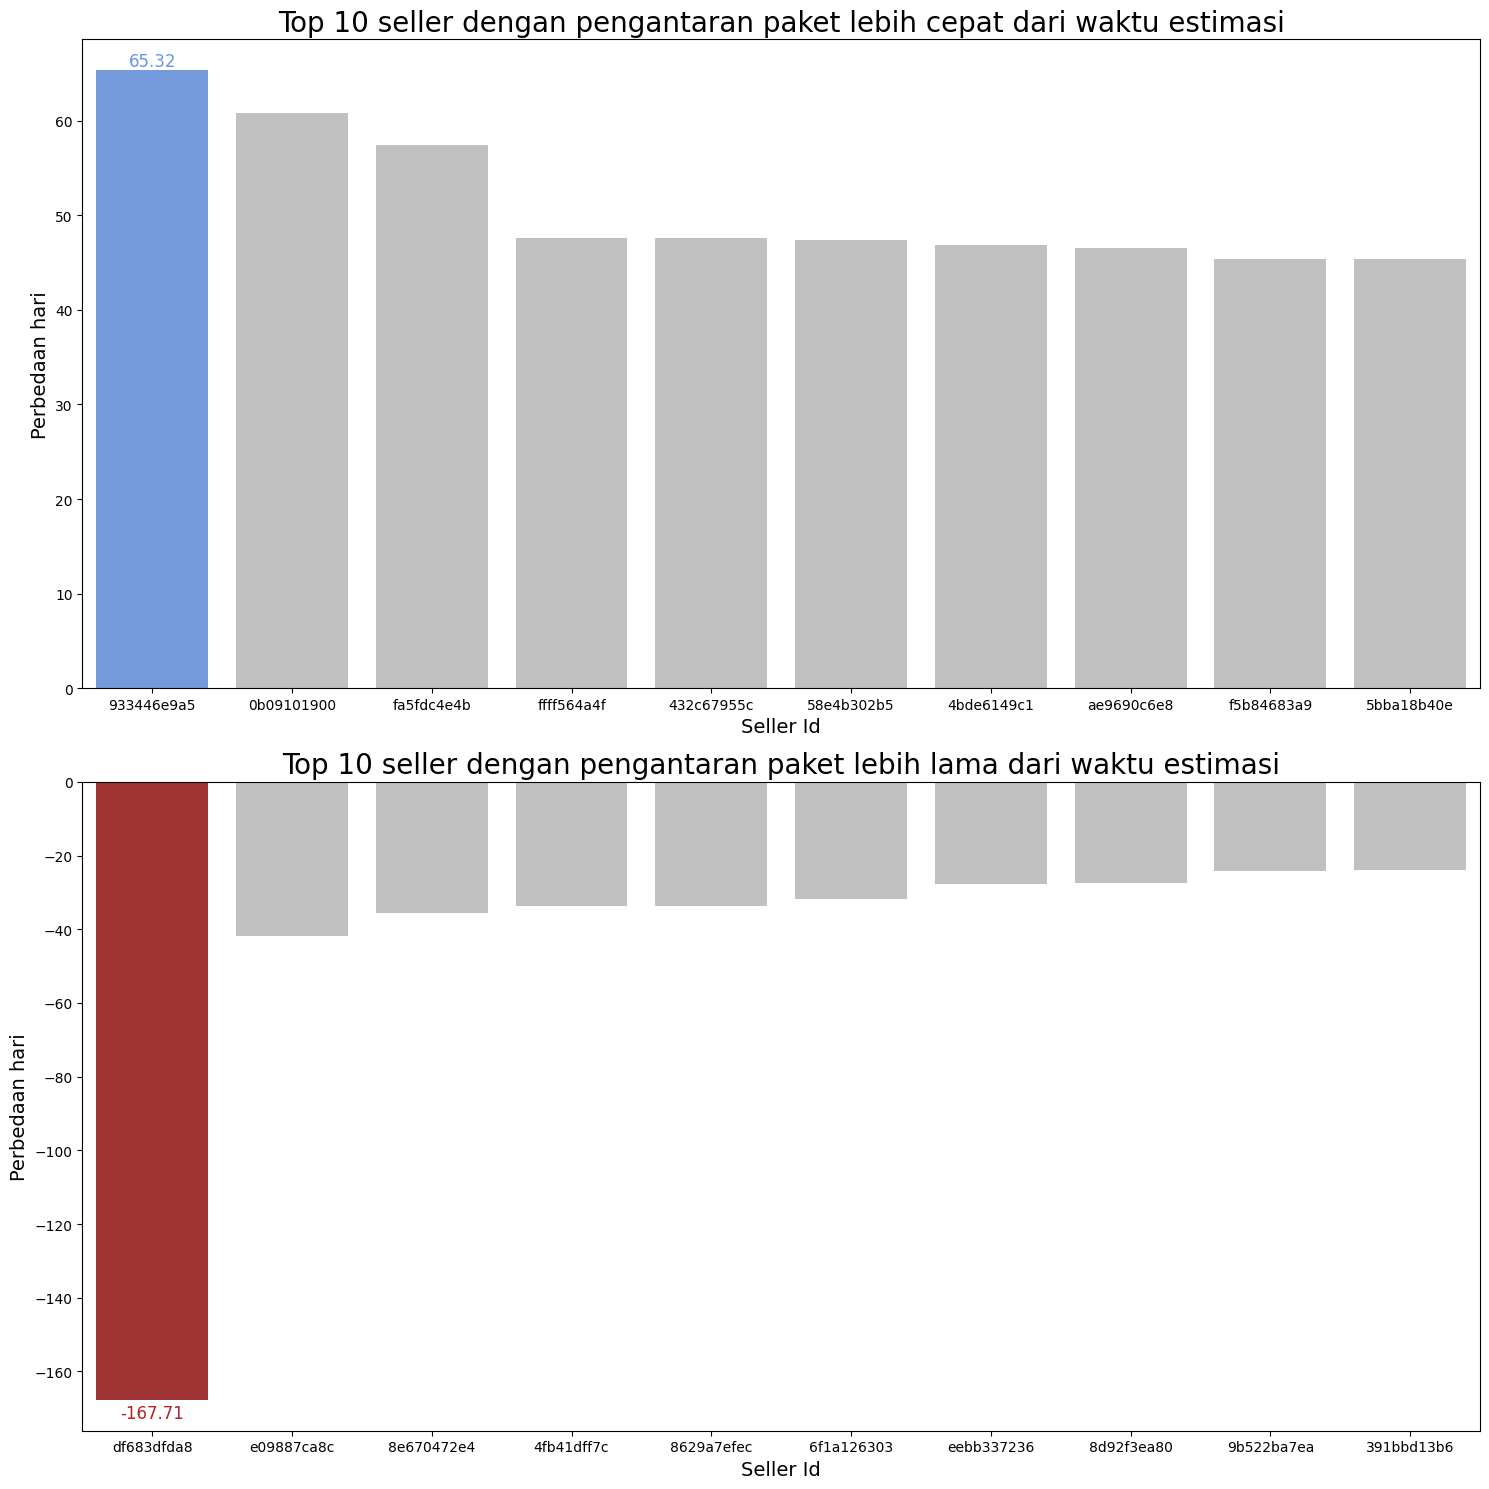

In [214]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
max_value = mean_day_est_diff['day_estimated_difference'].head(10).max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in mean_day_est_diff['day_estimated_difference'].head(10)]
sns.barplot(x=mean_day_est_diff['seller_id'].head(10).str[:10],
            y=mean_day_est_diff['day_estimated_difference'].head(10),
            palette=colors_high, ax=ax[0])
for i, v in enumerate(mean_day_est_diff['day_estimated_difference'].head(10)):
    if v == max_value:
        ax[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax[0].set_xlabel('Seller Id', fontsize=14)
ax[0].set_ylabel('Perbedaan hari', fontsize=14)
ax[0].set_title('Top 10 seller dengan pengantaran paket lebih cepat dari waktu estimasi', fontsize=20)

min_value = mean_day_est_diff['day_estimated_difference'].tail(10).min()
colors_low = ['silver' if v != min_value else 'firebrick' for v in mean_day_est_diff['day_estimated_difference'].tail(10)]
sns.barplot(x=mean_day_est_diff['seller_id'].tail(10).iloc[::-1].str[:10],
            y=mean_day_est_diff['day_estimated_difference'].tail(10).iloc[::-1],
            palette=colors_low[::-1], ax=ax[1])
for i, v in enumerate(mean_day_est_diff['day_estimated_difference'].tail(10).iloc[::-1]):
    if v == min_value:
        ax[1].text(i, v-1, str(v), ha='center', va='top', fontsize=12, color='firebrick')

ax[1].set_xlabel('Seller Id', fontsize=14)
ax[1].set_ylabel('Perbedaan hari', fontsize=14)
ax[1].set_title('Top 10 seller dengan pengantaran paket lebih lama dari waktu estimasi', fontsize=20)

plt.tight_layout()

plt.show()

## Bagaimana penilaian kepuasan pada customer terhadap pesanan yang diterima?

In [215]:
count_rating = new_all_data.groupby('review_score').count()['order_id'].reset_index().sort_values('order_id', ascending=False)
count_rating

,review_score,order_id
4,5,56180
3,4,18732
0,1,10601
2,3,7985
1,2,3018


In [216]:
count_rating['order_id']

4    56180
3    18732
0    10601
2     7985
1     3018
Name: order_id, dtype: int64

In [217]:
count_rating['review_score']

4    5
3    4
0    1
2    3
1    2
Name: review_score, dtype: int64

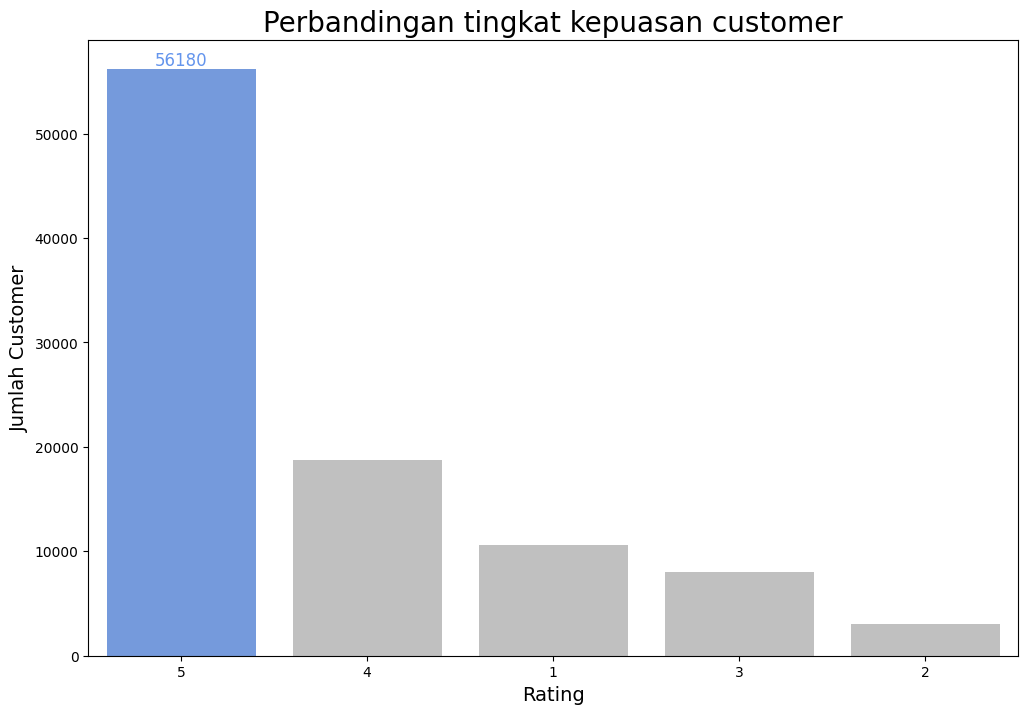

In [248]:
plt.figure(figsize=(12, 8))
max_value = count_rating['order_id'].max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in count_rating['order_id']]
ax = sns.barplot(x=count_rating['review_score'],
                 y=count_rating['order_id'],
                 palette=colors_high,
                 order=count_rating.review_score)
for i, v in enumerate(count_rating['order_id']):
    if v == max_value:
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax.set_xlabel('Rating', fontsize=14)
ax.set_ylabel('Jumlah Customer', fontsize=14)
ax.set_title('Perbandingan tingkat kepuasan customer', fontsize=20)

plt.show()

## Bagaimana RFM analysis pada customer?

In [219]:
new_cust_data = new_all_data.dropna(subset='order_delivered_customer_date')[['customer_id',
                                                                             'order_estimated_delivery_date',
                                                                             'payment_value_y']].sort_values(['customer_id', 'order_estimated_delivery_date'])
new_cust_data

,customer_id,order_estimated_delivery_date,payment_value_y
0,00012a2ce6f8dcda20d059ce98491703,2017-12-04,114.74
1,000161a058600d5901f007fab4c27140,2017-08-04,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-22,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-09-14,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-18,107.01
...,...,...,...
96511,fffcb937e9dd47a13f05ecb8290f4d3e,2018-04-05,91.91
96512,fffecc9f79fd8c764f843e9951b11341,2018-04-27,81.36
96513,fffeda5b6d849fbd39689bb92087f431,2018-06-29,63.13
96514,ffff42319e9b2d713724ae527742af25,2018-06-25,214.13


In [226]:
new_cust_data['recency'] = (datetime.now().date() - new_cust_data['order_estimated_delivery_date'].dt.date).dt.days

In [234]:
frequency_data = all_data.groupby('customer_id')['order_id'].count().reset_index()
frequency_data.rename(columns= {'order_id': 'frequency'}, inplace = True)
new_cust_data = new_cust_data.merge(frequency_data, on = 'customer_id', how = 'left')

In [238]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

new_cust_data['recency_score'] = pd.cut(new_cust_data['recency'], bins = 5, labels= recency_scores)
new_cust_data['frequency_score'] = pd.cut(new_cust_data['frequency'], bins = 5, labels= frequency_scores)
new_cust_data['monetary_score'] = pd.cut(new_cust_data['payment_value_y'], bins= 5, labels= monetary_scores)

In [244]:
new_cust_data['recency_score'] = new_cust_data['recency_score'].astype(int)
new_cust_data['frequency_score'] = new_cust_data['frequency_score'].astype(int)
new_cust_data['monetary_score'] = new_cust_data['monetary_score'].astype(int)

In [245]:
new_cust_data['RFM_score'] = new_cust_data['recency_score'] + new_cust_data['frequency_score'] + new_cust_data['monetary_score']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
new_cust_data['value_segment'] = pd.qcut(new_cust_data['RFM_score'], q= 3, labels= segment_labels)

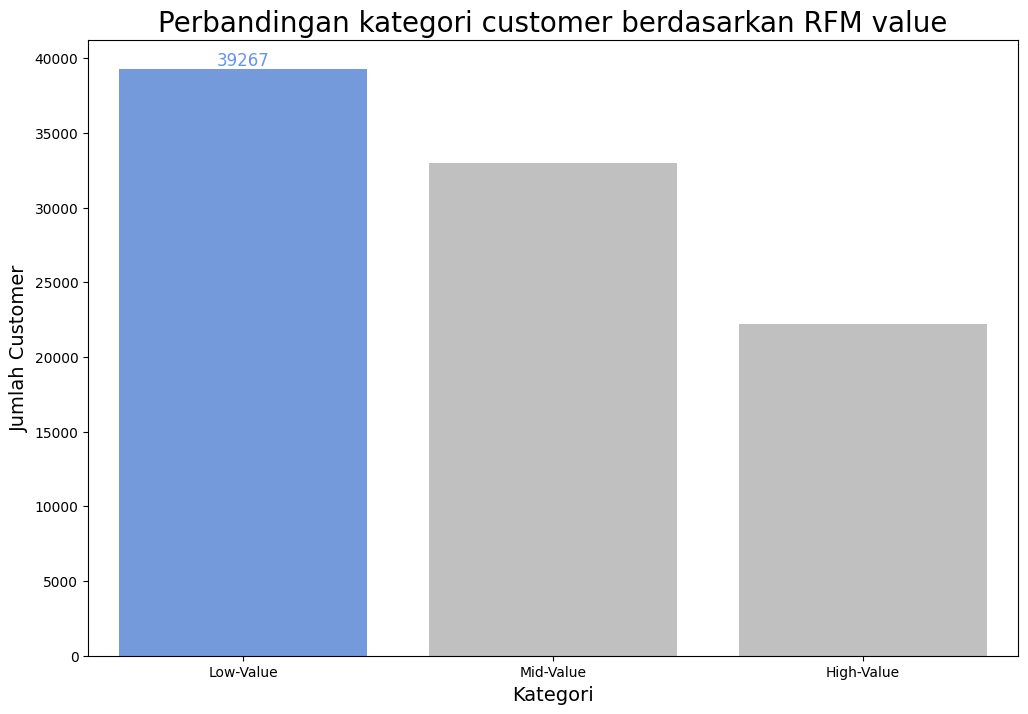

In [276]:
segment_counts = new_cust_data['value_segment'].value_counts().reset_index()
segment_counts.columns = ['value_segment', 'count']

plt.figure(figsize=(12, 8))
max_value = segment_counts['count'].max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in segment_counts['count']]
ax = sns.barplot(x=segment_counts['value_segment'],
                 y=segment_counts['count'],
                 palette=colors_high)
for i, v in enumerate(segment_counts['count']):
    if v == max_value:
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax.set_xlabel('Kategori', fontsize=14)
ax.set_ylabel('Jumlah Customer', fontsize=14)
ax.set_title('Perbandingan kategori customer berdasarkan RFM value', fontsize=20)

plt.show()

In [250]:
new_cust_data['RFM_customer_segments'] = ''

new_cust_data.loc[new_cust_data['RFM_score'] >= 9, 'RFM_customer_segments'] = 'Champions'
new_cust_data.loc[(new_cust_data['RFM_score'] >= 6) & (new_cust_data['RFM_score'] < 9), 'RFM_customer_segments'] = 'Potential Loyalists'
new_cust_data.loc[(new_cust_data['RFM_score'] >= 5) & (new_cust_data['RFM_score'] < 6), 'RFM_customer_segments'] = 'At-Risk Customers'
new_cust_data.loc[(new_cust_data['RFM_score'] >= 4) & (new_cust_data['RFM_score'] < 5), 'RFM_customer_segments'] = 'Cannot Lose'
new_cust_data.loc[(new_cust_data['RFM_score'] >= 3) & (new_cust_data['RFM_score'] < 4), 'RFM_customer_segments'] = 'Lost'

In [254]:
segment_product_counts = new_cust_data.groupby(['value_segment', 'RFM_customer_segments']).size().reset_index(name = 'count')
segment_product_counts = segment_product_counts.sort_values('count', ascending= False)
segment_product_counts = segment_product_counts[segment_product_counts['count'] > 1]
segment_product_counts

,value_segment,RFM_customer_segments,count
9,Mid-Value,Potential Loyalists,32991
0,Low-Value,At-Risk Customers,23025
14,High-Value,Potential Loyalists,22225
1,Low-Value,Cannot Lose,14172
3,Low-Value,Lost,2070
12,High-Value,Champions,3


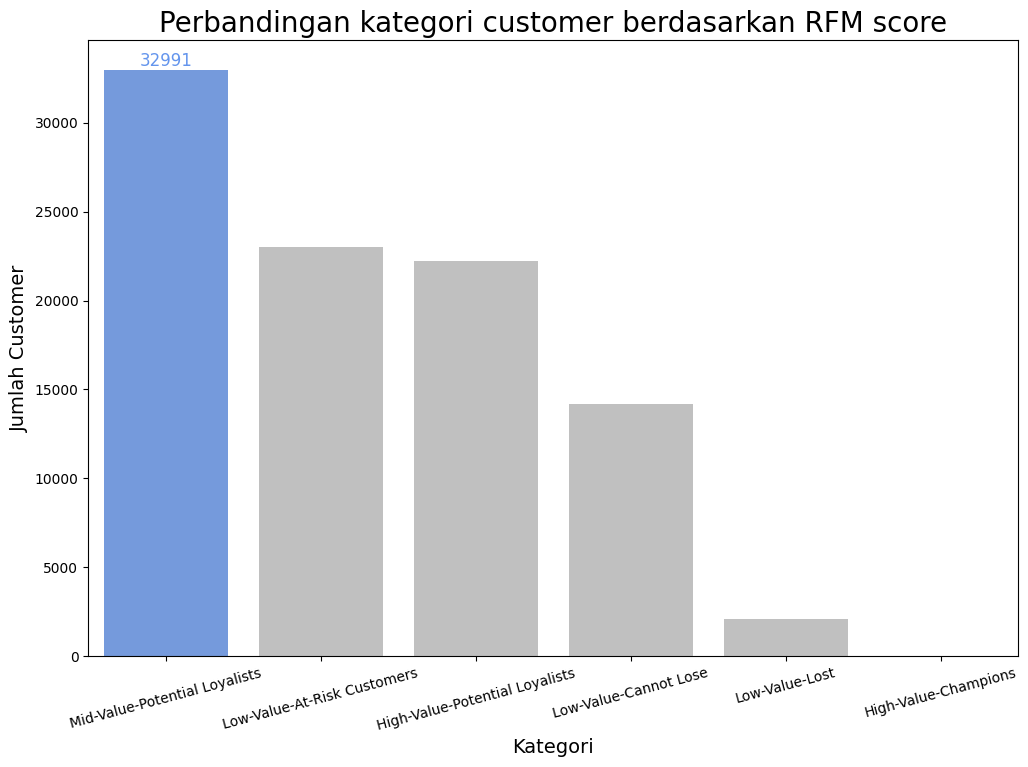

In [273]:
x_label = [f'{i}-{j}' for i, j in zip(segment_product_counts['value_segment'],
                                      segment_product_counts['RFM_customer_segments'])]

plt.figure(figsize=(12, 8))
max_value = segment_product_counts['count'].max()
colors_high = ['silver' if v != max_value else 'cornflowerblue' for v in segment_product_counts['count']]
ax = sns.barplot(x=x_label,
                 y=segment_product_counts['count'],
                 palette=colors_high)
for i, v in enumerate(segment_product_counts['count']):
    if v == max_value:
        ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12, color='cornflowerblue')

ax.set_xlabel('Kategori', fontsize=14)
ax.set_ylabel('Jumlah Customer', fontsize=14)
ax.set_title('Perbandingan kategori customer berdasarkan RFM score', fontsize=20)
ax.tick_params(axis='x', labelrotation=15)

plt.show()